# Assignment Visualising Data 2020

## Jianyu He, D17124591
## note: I am sorry for submit lab week 6 later, can you please mark week 6, thank you so much.

## My dataset is about google play app
## Author: Lavanya Gupta
## URL: https://www.kaggle.com/lava18/google-play-store-apps#googleplaystore.csv
## Description 

### Context
#### While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

### Content
#### Each app (row) has values for catergory, rating, size, and more.

### Acknowledgements
#### This information is scraped from the Google Play Store. This app information would not be available without it.

### Inspiration
#### The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## Data file Description
### There are 2 data file
### googleplaystore.csv
#### details of the applications on Google Play. There are 13 features th*strong strong texttext*at describe a given app.. Expilo. Ed
### googleplaystore_user_reviews.csv
#### This file contains the first 'most relevant' 100 reviews for each app. Each review text/comment has been pre-processed and attributed with 3 new features - Sentiment, Sentiment Polarity and Sentiment Subjectivity.

## Attributes Data Type
### googleplaystore.csv
#### App: Categorical data
#### Category: Categorical data
#### Rating: Continuous Numeric data
#### Reviews: Continuous Numeric data
#### Size: Continuous Numeric data
#### Installs: Continuous Numeric data
#### Type: Categorical data
#### Price: Continuous Numeric data
#### Content Rating: Categorical data
#### Genres: Categorical data
#### Last Updated: Temporal data
#### Current Ver: Categorical data
#### Android Ver: Categorical data

### googleplaystore_user_reviews.csv
#### App: Categorical data
#### Translated_Review: Text data
#### Sentiment: Categorical data
#### Sentiment_Polarity: Continuous Numeric data
#### Sentiment_Subjectivity: Continuous Numeric data




In [1]:
library("rio")
library("dplyr")
library("ggplot2")
library("stringr")
library("tm")
install.packages("textcat")
library("textcat")

library("SnowballC")
library("wordcloud")
library("RColorBrewer")

Warning message:
"package 'rio' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tm' was built under R version 3.6.3"
Loading required package: NLP


Attaching package: 'NLP'


The following object is masked from 'package:ggplot2':

    annotate


Installing package into 'C:/Users/1/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'textcat' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\1\AppData\Local\Temp\RtmpAhUxN0\downloaded_packages


Warning message:
"package 'textcat' was built under R version 3.6.3"
Warning message:
"package 'wordcloud' was built under R version 3.6.3"
Loading required package: RColorBrewer



In [2]:

review = import('googleplaystore_user_reviews.csv',check.names=TRUE,encoding='Latin-1')
#review = review[-c(64295), ]
review


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case """"10 Best Foods"""" helps lot, also """"Best Before (Shelf Life)""""",Positive,1.0000000,0.5333333
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.2500000,0.2884615
3,10 Best Foods for You,nan,nan,NaN,NaN
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.4000000,0.8750000
5,10 Best Foods for You,Best idea us,Positive,1.0000000,0.3000000
6,10 Best Foods for You,Best way,Positive,1.0000000,0.3000000
7,10 Best Foods for You,Amazing,Positive,0.6000000,0.9000000
8,10 Best Foods for You,nan,nan,NaN,NaN
9,10 Best Foods for You,"Looking forward app,",Neutral,0.0000000,0.0000000


In [3]:
app = import('googleplaystore.csv',check.names=TRUE,encoding='Latin-1')
app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
3,"U Launcher Lite ¨C FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
5,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
6,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
7,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
8,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
9,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up


In [4]:
#gsub("[a-zA-Z ]", "", data$Size)
#data$Size = str_replace_all(data$Size, "[a-zA-Z ]", "")
#unique(data$Size)
#data$Installs = removePunctuation(data$Installs)
#data$Installs

#which(str_detect(review$App, '<'))
#str_locate_all(pattern ='<99>', review$App[220])
#which( tolower(review$Sentiment_Polarity) =='nan' )
#nrow(subset(review, App ==toString(review[220,1]) ))
#length(which(review$App ==toString(review[220,1])))


# Data Explore

In [5]:
#first check values of app attribute from googleplaystore.csv
unique(app$App)

[1] "Photo Editor & Candy Camera & Grid & ScrapBook"                                                                                                                                                    
   [2] "Coloring book moana"                                                                                                                                                                               
   [3] "U Launcher Lite ¨C FREE Live Cool Themes, Hide Apps"                                                                                                                                               
   [4] "Sketch - Draw & Paint"                                                                                                                                                                             
   [5] "Pixel Draw - Number Art Coloring Book"                                                                                                                                                             
   [6] "Paper flowers instructions"                                                                                                                                                                        
   [7] "Smoke Effect Photo Maker - Smoke Editor"                                                                                                                                                           
   [8] "Infinite Painter"                                                                                                                                                                                  
   [9] "Garden Coloring Book"                                                                                                                                                                              
  [10] "Kids Paint Free - Drawing Fun"                                                                                                                                                                     
  [11] "Text on Photo - Fonteee"                                                                                                                                                                           
  [12] "Name Art Photo Editor - Focus n Filters"                                                                                                                                                           
  [13] "Tattoo Name On My Photo Editor"                                                                                                                                                                    
  [14] "Mandala Coloring Book"                                                                                                                                                                             
  [15] "3D Color Pixel by Number - Sandbox Art Coloring"                                                                                                                                                   
  [16] "Learn To Draw Kawaii Characters"                                                                                                                                                                   
  [17] "Photo Designer - Write your name with shapes"                                                                                                                                                      
  [18] "350 Diy Room Decor Ideas"                                                                                                                                                                          
  [19] "FlipaClip - Cartoon animation"                                                                                                                                                                     
  [20] "ibis Paint X"                                                                                                          

In [6]:
#create function to delete app which app name is unknown eg. "FP §2§<d1>§ù§ò§ú§<e4>§í§<db> §<d5>§ú§<e3>§á§Y§<d6>§<db>"
tail_head = function(x){
    no1 = {}
    #store no of row from tail to head, this will not make mistake for delete rows
for(i in length(x):1){
   no1 <- c(no1, x[i])  
}
    return(no1)
}
delete_unknown =  function(x){
    #find no of row which is unknown
no = grep("<", x$App, fixed = TRUE)
no1 = tail_head(no)
    
#use loop to delete unknown app name    
for(i in no1)
    {
    if(str_count(x$App[i], "[a-zA-Z ]") <20){
        
    print(paste0("delete app: " ,x$App[i]))
       x = x[-c(i),]
       
    }
     }
   return(x)
}

In [7]:
review1 = delete_unknown(review)
app1 = delete_unknown(app)


[1] "delete app: GANMA! - ￥a￥ê￥<b8>￥ê￥<eb><c2>t<bb>-¤<ac>è<ab><d4>’<9f>oá<cf>¤<c7><d5>i¤<df>·<c5><ee>}"
[1] "delete app: GANMA! - ￥a￥ê￥<b8>￥ê￥<eb><c2>t<bb>-¤<ac>è<ab><d4>’<9f>oá<cf>¤<c7><d5>i¤<df>·<c5><ee>}"
[1] "delete app: GANMA! - ￥a￥ê￥<b8>￥ê￥<eb><c2>t<bb>-¤<ac>è<ab><d4>’<9f>oá<cf>¤<c7><d5>i¤<df>·<c5><ee>}"
[1] "delete app: GANMA! - ￥a￥ê￥<b8>￥ê￥<eb><c2>t<bb>-¤<ac>è<ab><d4>’<9f>oá<cf>¤<c7><d5>i¤<df>·<c5><ee>}"
[1] "delete app: GANMA! - ￥a￥ê￥<b8>￥ê￥<eb><c2>t<bb>-¤<ac>è<ab><d4>’<9f>oá<cf>¤<c7><d5>i¤<df>·<c5><ee>}"
[1] "delete app: GANMA! - ￥a￥ê￥<b8>￥ê￥<eb><c2>t<bb>-¤<ac>è<ab><d4>’<9f>oá<cf>¤<c7><d5>i¤<df>·<c5><ee>}"
[1] "delete app: GANMA! - ￥a￥ê￥<b8>￥ê￥<eb><c2>t<bb>-¤<ac>è<ab><d4>’<9f>oá<cf>¤<c7><d5>i¤<df>·<c5><ee>}"
[1] "delete app: GANMA! - ￥a￥ê￥<b8>￥ê￥<eb><c2>t<bb>-¤<ac>è<ab><d4>’<9f>oá<cf>¤<c7><d5>i¤<df>·<c5><ee>}"
[1] "delete app: GANMA! - ￥a￥ê￥<b8>￥ê￥<eb><c2>t<bb>-¤<ac>è<ab><d4>’<9f>oá<cf>¤<c7><d5>i¤<df>·<c5><ee>}"
[1] "delete app: GANMA! - ￥a￥ê￥<b8>￥ê￥<eb><c2>t<bb>-¤<ac>è<ab><d

[1] "delete app: FP §2§<d1>§ù§ò§ú§<e4>§í§<db> §<d5>§ú§<e3>§á§Y§<d6>§<db>"
[1] "delete app: 1t1t<c4>·ì<d8>2<bb>EY"
[1] "delete app: ￥<d1><a9>`￥ê<a9>`￥2￥¤￥<c4>1<ab>ê<bd>í¨<d8><9c>￡üEJ STYLE￡¨￥¤<a9>`￥<b8>￥§￥¤￥1￥<bf>￥¤￥<eb>￡<a9>"
[1] "delete app: EI1ú<bc>ê"
[1] "delete app: EF Par§<d6>nts"
[1] "delete app: EC￥ê￥ó<a1>á￥·￥<e5>￥<d5><a9>`"
[1] "delete app: ó￠<9d>h×<d6>μ<e4> EC Dictionary"
[1] "delete app: RPG ￥<d6>￥ì￥¤￥<b8>￥ó￥° ￥<bd>￥|￥<eb>￥o ￥￠￥ˉ￥<bb>￥ì￥¤￥è"
[1] "delete app: Digoo<a1>¤Cloud"
[1] "delete app: DF <cb><be><99>C"
[1] "delete app: Oraci¨<ae>n CX"
[1] "delete app: §<a1>im Training for CS"
[1] "delete app: CK 3<f5>ò<bb> ê<ae><ce><e5>"
[1] "delete app: CE-SETRAM l<a1>ˉAppli"
[1] "delete app: §￠§ú§Y§<d6>§<e4>§í §±§￥§￥ CD 2019 PRO"
[1] "delete app: Vipêó<c6>μ<c3>a·<d1><bf>′-BT′<c5>á|<cb><d1><cb>÷"
[1] "delete app: Str?t¨<ae>.is"
[1] "delete app: Bono<a1>ˉs Pit Bar-B-Q"
[1] "delete app: Casual Sic Bo (÷<bb><8c><9a>)"
[1] "delete app: ¤￠¤ê￥<ab>￥ì<a1><be>BL<a1><bf><9f>oá<cf>￥2<a9>`￥à"
[1]

In [8]:
#check category of app, the data is fine
unique(app1$Category)

[1] "ART_AND_DESIGN"      "AUTO_AND_VEHICLES"   "BEAUTY"             
 [4] "BOOKS_AND_REFERENCE" "BUSINESS"            "COMICS"             
 [7] "COMMUNICATION"       "DATING"              "EDUCATION"          
[10] "ENTERTAINMENT"       "EVENTS"              "FINANCE"            
[13] "FOOD_AND_DRINK"      "HEALTH_AND_FITNESS"  "HOUSE_AND_HOME"     
[16] "LIBRARIES_AND_DEMO"  "LIFESTYLE"           "GAME"               
[19] "FAMILY"              "MEDICAL"             "SOCIAL"             
[22] "SHOPPING"            "PHOTOGRAPHY"         "SPORTS"             
[25] "TRAVEL_AND_LOCAL"    "TOOLS"               "PERSONALIZATION"    
[28] "PRODUCTIVITY"        "PARENTING"           "WEATHER"            
[31] "VIDEO_PLAYERS"       "NEWS_AND_MAGAZINES"  "MAPS_AND_NAVIGATION"
[34] "1.9"

In [9]:
#check values of rating of app, there exist a nan value
unique(app1$Rating)

[1]  4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.0  NaN  4.8  4.9  3.6
[16]  3.7  3.3  3.4  3.5  3.1  5.0  2.6  3.0  1.9  2.5  2.8  2.7  1.0  2.9  2.3
[31]  2.2  1.7  2.0  1.8  2.4  1.6  2.1  1.4  1.5  1.2 19.0

In [10]:
#find 
qq=subset(app1, Rating =="NaN" )
qq

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
24,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
114,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8,3.0 and up
124,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
127,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
130,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2,2.3 and up
131,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2,3.0 and up
135,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3,3.0 and up
164,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0,Everyone,Books & Reference,"July 13, 2018",1,2.3 and up
181,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0,Everyone,Books & Reference,"June 15, 2018",3,6.0 and up


In [11]:
#use loop to find app name in user review which rating is nan, as result its not exists in user review, so i decide to delete them.
app2 = app1
for(i in 1:length(qq)){
    if(nrow(subset(review1, App ==qq$App[i]))>0){
        
        print(qq$App[i])
    }
    
}
#use loop to delete app which rating is nan
w = which(app1$Rating =="NaN")
w1 = tail_head(w)
for(i in w1){
    app2 = app2[-c(i),]
}
qq=subset(app2, Rating =="NaN" )
qq
app2

App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
3,"U Launcher Lite ¨C FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
5,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
6,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
7,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
8,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
9,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up


In [12]:
#check values of reviews of app, the data is ok, change datatype to number
unique(app2$Reviews)
app2$Reviews = as.numeric(app2$Reviews)



[1] "159"      "967"      "87510"    "215644"   "167"      "178"     
   [7] "36815"    "13791"    "121"      "13880"    "8788"     "44829"   
  [13] "4326"     "1518"     "55"       "3632"     "27"       "194216"  
  [19] "224399"   "450"      "654"      "7699"     "118"      "192"     
  [25] "20260"    "203"      "136"      "223"      "1120"     "227"     
  [31] "5035"     "1015"     "353"      "564"      "8145"     "36639"   
  [37] "158"      "591"      "117"      "176"      "295221"   "2206"    
  [43] "26"       "174531"   "1070"     "85"       "845"      "367"     
  [49] "1598"     "284"      "17057"    "129"      "542"      "10479"   
  [55] "805"      "1403"     "3971"     "534"      "7774"     "38846"   
  [61] "2431"     "6090"     "295"      "190"      "40211"    "356"     
  [67] "52530"    "116986"   "1379"     "271920"   "736"      "7021"    
  [73] "197"      "737"      "3574"     "994"      "197136"   "142"     
  [79] "15168"    "2155"     "138"      "5414"     "21777"    "348"     
  [85] "250"      "13372"    "7880"     "3617"     "4806"     "65786"   
  [91] "31433"    "5097"     "1754"     "2680"     "1288"     "18900"   
  [97] "49790"    "1150"     "1739"     "32090"    "2225"     "4369"    
 [103] "8572"     "964"      "42050"    "104"      "17934"    "601"     
 [109] "36"       "187"      "30"       "134"      "74"       "113715"  
 [115] "3595"     "9315"     "75"       "38"       "26834"    "2277"    
 [121] "2280"     "184"      "9"        "364"      "18"       "473"     
 [127] "66"       "3871"     "257"      "62"       "2914724"  "1857"    
 [133] "4478"     "577550"   "814080"   "246315"   "454060"   "155446"  
 [139] "418"      "22486"    "203130"   "1435"     "116507"   "1433233" 
 [145] "90468"    "860"      "363934"   "87873"    "17506"    "1862"    
 [151] "2084"     "47303"    "19080"    "85842"    "7831"     "91615"   
 [157] "4620"     "21336"    "26875"    "1778"     "2709"     "64513"   
 [163] "8342"     "527"      "1322"     "1680"     "2739"     "1065"    
 [169] "233757"   "51269"    "30105"    "156"      "341157"   "16129"   
 [175] "674730"   "1254730"  "85185"    "32584"    "217730"   "70991"   
 [181] "1002861"  "16589"    "148945"   "4458"     "62272"    "8941"    
 [187] "46353"    "1279184"  "88073"    "67000"    "159872"   "30847"   
 [193] "188841"   "11622"    "95912"    "4034"     "45964"    "14955"   
 [199] "6903"     "31614"    "23055"    "19023"    "207372"   "1225"    
 [205] "380837"   "10600"    "74359"    "822"      "80805"    "2287"    
 [211] "4162"     "14760"    "23243"    "8978"     "42492"    "286897"  
 [217] "103755"   "46505"    "11442"    "10295"    "296"      "29313"   
 [223] "51507"    "1802"     "1383"     "23175"    "5868"     "2111"    
 [229] "5448"     "4159"     "20815"    "78662"    "7149"     "3079"    
 [235] "5800"     "6989"     "16422"    "108741"   "624"      "1661"    
 [241] "97702"    "308"      "5211"     "1058"     "78172"    "80804"   
 [247] "1002859"  "51510"    "413"      "1013635"  "24005"    "57106"   
 [253] "2249"     "516"      "834"      "1010"     "238970"   "302"     
 [259] "438"      "73"       "39"       "144"      "2181"     "93965"   
 [265] "1446"     "12088"    "314"      "25671"    "15194"    "22551"   
 [271] "29839"    "279"      "564387"   "1677"     "757"      "115"     
 [277] "125"      "9952"     "18814"    "21"       "15"       "51981"   
 [283] "3596"     "1006"     "5968"     "4895"     "56642847" "69119316"
 [289] "125257"   "9642995"  "1429035"  "4604324"  "3419249"  "11334799"
 [295] "158679"   "3075028"  "4187998"  "659395"   "4785892"  "66602"   
 [301] "30209"    "36901"    "5149854"  "192948"   "99559"    "437674"  
 [307] "13698"    "2473509"  "20769"    "36880"    "171031"   "63543"   
 [313] "45487"    "615381"   "2451083"  "33053"    "5387333"  "3648120" 
 [319] "136662"   "42370"    "781810"   "3128250"  "2083237"  "541389"  
 [325] "46702"    "2939"     "13761"    "258556"   "40751"   

Warning message in eval(expr, envir, enclos):
"强制改变过程中产生了NA"


In [13]:
#check size of app, there are 2 type of unit and one type of category value, I decide change all unit to k and delete rows of category values
unique(app2$Size)

[1] "19M"                "14M"                "8.7M"              
  [4] "25M"                "2.8M"               "5.6M"              
  [7] "29M"                "33M"                "3.1M"              
 [10] "28M"                "12M"                "20M"               
 [13] "21M"                "37M"                "2.7M"              
 [16] "5.5M"               "17M"                "39M"               
 [19] "31M"                "4.2M"               "23M"               
 [22] "6.0M"               "6.1M"               "4.6M"              
 [25] "9.2M"               "5.2M"               "11M"               
 [28] "24M"                "Varies with device" "9.4M"              
 [31] "15M"                "10M"                "1.2M"              
 [34] "26M"                "8.0M"               "7.9M"              
 [37] "56M"                "57M"                "35M"               
 [40] "54M"                "201k"               "3.6M"              
 [43] "5.7M"               "8.6M"               "2.4M"              
 [46] "27M"                "2.5M"               "7.0M"              
 [49] "16M"                "3.4M"               "8.9M"              
 [52] "3.9M"               "2.9M"               "38M"               
 [55] "32M"                "5.4M"               "18M"               
 [58] "1.1M"               "2.2M"               "4.5M"              
 [61] "9.8M"               "52M"                "9.0M"              
 [64] "6.7M"               "30M"                "2.6M"              
 [67] "7.1M"               "22M"                "6.4M"              
 [70] "3.2M"               "8.2M"               "4.9M"              
 [73] "9.5M"               "5.0M"               "5.9M"              
 [76] "13M"                "73M"                "6.8M"              
 [79] "3.5M"               "4.0M"               "2.3M"              
 [82] "2.1M"               "42M"                "9.1M"              
 [85] "55M"                "23k"                "7.3M"              
 [88] "6.5M"               "1.5M"               "7.5M"              
 [91] "51M"                "41M"                "48M"               
 [94] "8.5M"               "46M"                "8.3M"              
 [97] "4.3M"               "4.7M"               "3.3M"              
[100] "40M"                "7.8M"               "8.8M"              
[103] "6.6M"               "5.1M"               "61M"               
[106] "66M"                "79k"                "8.4M"              
[109] "3.7M"               "118k"               "44M"               
[112] "695k"               "1.6M"               "6.2M"              
[115] "53M"                "1.4M"               "3.0M"              
[118] "7.2M"               "5.8M"               "3.8M"              
[121] "9.6M"               "45M"                "63M"               
[124] "49M"                "77M"                "4.4M"              
[127] "70M"                "9.3M"               "8.1M"              
[130] "36M"                "6.9M"               "7.4M"              
[133] "84M"                "97M"                "2.0M"              
[136] "1.9M"               "1.8M"               "5.3M"              
[139] "47M"                "556k"               "526k"              
[142] "76M"                "7.6M"               "59M"               
[145] "9.7M"               "78M"                "72M"               
[148] "43M"                "7.7M"               "6.3M"              
[151] "334k"               "93M"                "65M"               
[154] "79M"                "100M"               "58M"               
[157] "50M"                "68M"                "64M"               
[160] "34M"                "67M"                "60M"               
[163] "94M"                "9.9M"               "232k"              
[166] "99M"                "624k"               "95M"               
[169] "8.5k"               "41k"                "292k"              
[172] "11k"                "80M"                "1.7M"              


In [14]:
#delete size which is varies with device
app3 = app2
w = which(app3$Size =="Varies with device")
w1 = tail_head(w)
for(i in w1){
    app3 = app3[-c(i),]
}
qq=subset(app3, Size =="Varies with device" )
qq

App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [15]:
#change unit type form kb to mb
w = grep("k", app3$Size, fixed = TRUE)
app3$Size = str_replace_all(app3$Size, "[a-zA-Z ]", "")
for(i in w){
    app3$Size[i] = as.numeric(app3$Size[i])/1024
    print(app3$Size[i])
}
app3$Size = as.numeric(app3$Size)

[1] "0.1962890625"
[1] "0.0224609375"
[1] "0.0771484375"
[1] "0.115234375"
[1] "0.6787109375"
[1] "0.54296875"
[1] "0.513671875"
[1] "0.326171875"
[1] "0.2265625"
[1] "0.609375"
[1] "0.00830078125"
[1] "0.0400390625"
[1] "0.28515625"
[1] "0.0107421875"
[1] "0.6875"
[1] "0.841796875"
[1] "0.8779296875"
[1] "0.369140625"
[1] "0.259765625"
[1] "0.3662109375"
[1] "0.9521484375"
[1] "0.95703125"
[1] "0.6796875"
[1] "0.53125"
[1] "0.5126953125"
[1] "0.8984375"
[1] "0.7607421875"
[1] "0.8330078125"
[1] "0.703125"
[1] "0.6962890625"
[1] "0.75390625"
[1] "0.310546875"
[1] "0.056640625"
[1] "0.2353515625"
[1] "0.19140625"
[1] "0.8369140625"
[1] "0.0498046875"
[1] "0.9306640625"
[1] "0.8447265625"
[1] "0.2451171875"
[1] "0.908203125"
[1] "0.52734375"
[1] "0.3056640625"
[1] "0.728515625"
[1] "0.1982421875"
[1] "0.056640625"
[1] "0.025390625"
[1] "0.306640625"
[1] "0.19140625"
[1] "0.0771484375"
[1] "0.115234375"
[1] "0.2333984375"
[1] "0.3623046875"
[1] "0.21484375"
[1] "0.712890625"
[1] "0.738281

Warning message in eval(expr, envir, enclos):
"强制改变过程中产生了NA"


In [16]:
#Installs attribute should be a continuous number so delete "+" and "Free"
app4 = app3
unique(app4$Installs)
subset(app4, Installs =="Free" )
no = grep("Free", app4$Installs, fixed = TRUE)
app4 = app4[-c(no),]
app4$Installs = removePunctuation(app4$Installs)
unique(app4$Installs)
app4$Installs = as.numeric(app4$Installs)


[1] "10,000+"        "500,000+"       "5,000,000+"     "50,000,000+"   
 [5] "100,000+"       "50,000+"        "1,000,000+"     "10,000,000+"   
 [9] "5,000+"         "100,000,000+"   "1,000+"         "500,000,000+"  
[13] "100+"           "500+"           "10+"            "1,000,000,000+"
[17] "5+"             "50+"            "1+"             "Free"

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
10473,Life Made WI-Fi Touchscreen Photo Frame,1.9,19,NA,NA,Free,0,Everyone,,"February 11, 2018",1.0.19,4.0 and up,


[1] "10000"      "500000"     "5000000"    "50000000"   "100000"    
 [6] "50000"      "1000000"    "10000000"   "5000"       "100000000" 
[11] "1000"       "500000000"  "100"        "500"        "10"        
[16] "1000000000" "5"          "50"         "1"

In [17]:
# check attribute "Type" is ok
unique(app4$Type)

[1] "Free" "Paid"

In [18]:
# check attribute Price, this attribute should be a Continuous Numeric data, so remove "$"
app5 = app4
unique(app5$Price)
app5$Price = removePunctuation(app5$Price)
unique(app5$Price)
app5$Price = as.numeric(app5$Price)

[1] "0"       "$4.99"   "$6.99"   "$7.99"   "$3.99"   "$5.99"   "$2.99"  
 [8] "$1.99"   "$9.99"   "$0.99"   "$9.00"   "$5.49"   "$10.00"  "$24.99" 
[15] "$11.99"  "$79.99"  "$16.99"  "$14.99"  "$29.99"  "$12.99"  "$3.49"  
[22] "$10.99"  "$7.49"   "$1.50"   "$19.99"  "$15.99"  "$33.99"  "$39.99" 
[29] "$2.49"   "$4.49"   "$1.70"   "$1.49"   "$3.88"   "$399.99" "$17.99" 
[36] "$400.00" "$3.02"   "$1.76"   "$4.84"   "$4.77"   "$1.61"   "$1.59"  
[43] "$6.49"   "$1.29"   "$299.99" "$379.99" "$37.99"  "$18.99"  "$389.99"
[50] "$8.49"   "$1.75"   "$14.00"  "$2.00"   "$3.08"   "$2.59"   "$19.40" 
[57] "$15.46"  "$8.99"   "$3.04"   "$13.99"  "$4.29"   "$3.28"   "$4.60"  
[64] "$1.00"   "$2.90"   "$1.97"   "$2.56"   "$1.20"

[1] "0"     "499"   "699"   "799"   "399"   "599"   "299"   "199"   "999"  
[10] "099"   "900"   "549"   "1000"  "2499"  "1199"  "7999"  "1699"  "1499" 
[19] "2999"  "1299"  "349"   "1099"  "749"   "150"   "1999"  "1599"  "3399" 
[28] "3999"  "249"   "449"   "170"   "149"   "388"   "39999" "1799"  "40000"
[37] "302"   "176"   "484"   "477"   "161"   "159"   "649"   "129"   "29999"
[46] "37999" "3799"  "1899"  "38999" "849"   "175"   "1400"  "200"   "308"  
[55] "259"   "1940"  "1546"  "899"   "304"   "1399"  "429"   "328"   "460"  
[64] "100"   "290"   "197"   "256"   "120"

In [19]:
# check attribute content rating, there is a unrated, so romove this row
app6 = app5
unique(app6$Content.Rating)
subset(app6, Content.Rating =="Unrated" )
no = grep("Unrated", app6$Content.Rating, fixed = TRUE)
app6 = app6[-c(no),]
unique(app6$Content.Rating)

[1] "Everyone"        "Teen"            "Everyone 10+"    "Mature 17+"     
[5] "Adults only 18+" "Unrated"

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
8267,DC Universe Online Map,TOOLS,4.1,1186,6.4,50000,Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


[1] "Everyone"        "Teen"            "Everyone 10+"    "Mature 17+"     
[5] "Adults only 18+"

In [20]:
# check attribute "Genres" is ok
unique(app6$Genres)

[1] "Art & Design"                         
  [2] "Art & Design;Pretend Play"            
  [3] "Art & Design;Creativity"              
  [4] "Auto & Vehicles"                      
  [5] "Beauty"                               
  [6] "Books & Reference"                    
  [7] "Business"                             
  [8] "Comics"                               
  [9] "Comics;Creativity"                    
 [10] "Communication"                        
 [11] "Dating"                               
 [12] "Education"                            
 [13] "Education;Creativity"                 
 [14] "Education;Education"                  
 [15] "Education;Action & Adventure"         
 [16] "Education;Pretend Play"               
 [17] "Education;Brain Games"                
 [18] "Entertainment"                        
 [19] "Entertainment;Brain Games"            
 [20] "Entertainment;Music & Video"          
 [21] "Events"                               
 [22] "Finance"                              
 [23] "Food & Drink"                         
 [24] "Health & Fitness"                     
 [25] "House & Home"                         
 [26] "Libraries & Demo"                     
 [27] "Lifestyle"                            
 [28] "Lifestyle;Pretend Play"               
 [29] "Adventure;Action & Adventure"         
 [30] "Arcade"                               
 [31] "Casual"                               
 [32] "Card"                                 
 [33] "Casual;Pretend Play"                  
 [34] "Strategy"                             
 [35] "Action"                               
 [36] "Puzzle"                               
 [37] "Sports"                               
 [38] "Word"                                 
 [39] "Racing"                               
 [40] "Casual;Creativity"                    
 [41] "Simulation"                           
 [42] "Adventure"                            
 [43] "Board"                                
 [44] "Trivia"                               
 [45] "Role Playing"                         
 [46] "Simulation;Education"                 
 [47] "Action;Action & Adventure"            
 [48] "Casual;Brain Games"                   
 [49] "Simulation;Action & Adventure"        
 [50] "Educational;Creativity"               
 [51] "Puzzle;Brain Games"                   
 [52] "Educational;Education"                
 [53] "Card;Brain Games"                     
 [54] "Educational;Brain Games"              
 [55] "Educational;Pretend Play"             
 [56] "Casual;Action & Adventure"            
 [57] "Entertainment;Education"              
 [58] "Casual;Education"                     
 [59] "Music;Music & Video"                  
 [60] "Arcade;Pretend Play"                  
 [61] "Simulation;Pretend Play"              
 [62] "Puzzle;Creativity"                    
 [63] "Racing;Action & Adventure"            
 [64] "Educational;Action & Adventure"       
 [65] "Arcade;Action & Adventure"            
 [66] "Entertainment;Action & Adventure"     
 [67] "Puzzle;Action & Adventure"            
 [68] "Role Playing;Action & Adventure"      
 [69] "Strategy;Action & Adventure"          
 [70] "Music & Audio;Music & Video"          
 [71] "Health & Fitness;Education"           
 [72] "Adventure;Education"                  
 [73] "Board;Brain Games"                    
 [74] "Board;Action & Adventure"             
 [75] "Board;Pretend Play"                   
 [76] "Casual;Music & Video"                 
 [77] "Education;Music & Video"              
 [78] "Role Playing;Pretend Play"            
 [79] "Entertainment;Pretend Play"           
 [80] "Video Players & Editors;Creativity"   
 [81] "Card;Action & Adventure"              
 [82] "Medical"                              
 [83] "Social"                               
 [84] "Shopping"                             
 [85] "Photography"                          
 [86] "Travel & Local"                       
 [87] "Travel & Local;Action & Adventure"    


In [21]:
# check attribute "Last.Updated" is ok
unique(app6$Last.Updated)

[1] "January 7, 2018"    "January 15, 2018"   "August 1, 2018"    
   [4] "June 8, 2018"       "June 20, 2018"      "March 26, 2017"    
   [7] "April 26, 2018"     "June 14, 2018"      "September 20, 2017"
  [10] "July 3, 2018"       "October 27, 2017"   "July 31, 2018"     
  [13] "April 2, 2018"      "June 26, 2018"      "August 3, 2018"    
  [16] "June 6, 2018"       "November 7, 2017"   "July 30, 2018"     
  [19] "April 20, 2018"     "March 20, 2018"     "July 12, 2018"     
  [22] "July 7, 2018"       "April 25, 2018"     "October 11, 2017"  
  [25] "March 21, 2018"     "August 22, 2017"    "May 31, 2018"      
  [28] "July 19, 2018"      "January 6, 2018"    "April 27, 2018"    
  [31] "July 11, 2018"      "August 2, 2018"     "November 29, 2017" 
  [34] "March 31, 2018"     "July 20, 2018"      "April 15, 2018"    
  [37] "January 3, 2018"    "November 14, 2017"  "December 17, 2017" 
  [40] "May 28, 2018"       "May 10, 2018"       "July 26, 2018"     
  [43] "July 18, 2018"      "July 29, 2018"      "August 26, 2014"   
  [46] "July 8, 2018"       "July 28, 2018"      "June 12, 2018"     
  [49] "October 14, 2016"   "July 16, 2018"      "July 27, 2018"     
  [52] "July 4, 2018"       "March 27, 2018"     "July 15, 2018"     
  [55] "July 24, 2018"      "July 23, 2018"      "May 16, 2018"      
  [58] "June 2, 2018"       "April 21, 2018"     "November 9, 2017"  
  [61] "May 15, 2018"       "February 28, 2018"  "July 25, 2018"     
  [64] "June 21, 2018"      "April 9, 2018"      "March 1, 2018"     
  [67] "April 5, 2018"      "November 21, 2017"  "October 18, 2017"  
  [70] "May 29, 2018"       "May 14, 2018"       "July 2, 2018"      
  [73] "June 7, 2018"       "May 24, 2018"       "June 1, 2018"      
  [76] "March 1, 2017"      "August 7, 2017"     "July 31, 2017"     
  [79] "January 21, 2018"   "May 27, 2018"       "July 17, 2018"     
  [82] "August 4, 2018"     "May 17, 2018"       "June 25, 2018"     
  [85] "June 29, 2018"      "November 23, 2017"  "October 16, 2014"  
  [88] "August 20, 2016"    "June 16, 2018"      "February 15, 2018" 
  [91] "April 13, 2016"     "February 8, 2018"   "September 11, 2015"
  [94] "July 10, 2018"      "March 26, 2018"     "January 31, 2018"  
  [97] "May 30, 2017"       "March 25, 2018"     "April 11, 2017"    
 [100] "June 15, 2018"      "April 18, 2018"     "July 13, 2018"     
 [103] "February 13, 2018"  "March 22, 2018"     "November 16, 2017" 
 [106] "July 9, 2018"       "December 27, 2017"  "March 5, 2018"     
 [109] "May 18, 2018"       "July 6, 2018"       "May 23, 2018"      
 [112] "December 18, 2017"  "May 26, 2018"       "June 19, 2018"     
 [115] "November 4, 2016"   "September 2, 2015"  "April 19, 2018"    
 [118] "August 27, 2017"    "April 1, 2016"      "July 10, 2017"     
 [121] "February 2, 2015"   "March 5, 2017"      "January 5, 2018"   
 [124] "December 4, 2017"   "July 5, 2018"       "January 24, 2018"  
 [127] "June 7, 2016"       "April 3, 2018"      "July 6, 2014"      
 [130] "September 28, 2016" "October 25, 2017"   "January 21, 2017"  
 [133] "January 27, 2017"   "February 3, 2017"   "February 25, 2016" 
 [136] "June 13, 2018"      "May 12, 2018"       "May 21, 2018"      
 [139] "November 6, 2017"   "January 28, 2017"   "February 1, 2017"  
 [142] "April 29, 2018"     "March 29, 2018"     "April 7, 2018"     
 [145] "June 15, 2017"      "July 14, 2018"      "June 28, 2018"     
 [148] "December 29, 2017"  "May 2, 2018"        "February 25, 2018" 
 [151] "June 22, 2018"      "March 23, 2018"     "February 3, 2018"  
 [154] "January 19, 2017"   "October 26, 2017"   "October 17, 2017"  
 [157] "October 23, 2016"   "March 9, 2018"      "November 28, 2017" 
 [160] "September 28, 2017" "January 16, 2017"   "July 4, 2016"      
 [163] "August 21, 2014"    "August 22, 2015"    "June 28, 2015"     
 [166] "December 25, 2017"  "July 11, 2014"      "April 29, 2015"    
 [169] "December 2, 2013"   "July 23, 2015"      "November 17, 2016" 
 [172] "June 

In [22]:
# check attribute "Current.Ver" is ok
unique(app6$Current.Ver)

[1] "1.0.0"                                             
   [2] "2.0.0"                                             
   [3] "1.2.4"                                             
   [4] "Varies with device"                                
   [5] "1.1"                                               
   [6] "1"                                                 
   [7] "6.1.61.1"                                          
   [8] "2.9.2"                                             
   [9] "2.8"                                               
  [10] "1.0.4"                                             
  [11] "1.0.15"                                            
  [12] "3.8"                                               
  [13] "1.2.3"                                             
  [14] "NaN"                                               
  [15] "3.1"                                               
  [16] "2.2.5"                                             
  [17] "5.5.4"                                             
  [18] "4"                                                 
  [19] "2.2.6.2"                                           
  [20] "1.1.3"                                             
  [21] "1.5"                                               
  [22] "1.0.8"                                             
  [23] "1.03"                                              
  [24] "6"                                                 
  [25] "6.7.12.2018"                                       
  [26] "1.2"                                               
  [27] "2.2"                                               
  [28] "1.1.0"                                             
  [29] "1.6"                                               
  [30] "2.1"                                               
  [31] "1.0.9"                                             
  [32] "1.3"                                               
  [33] "2.0.1"                                             
  [34] "1.46"                                              
  [35] "1.6.1"                                             
  [36] "11"                                                
  [37] "3"                                                 
  [38] "1.7.1"                                             
  [39] "2.5.1"                                             
  [40] "1.0.1"                                             
  [41] "2.493"                                             
  [42] "1.9.1"                                             
  [43] "1.7"                                               
  [44] "2.20 Build 02"                                     
  [45] "1.37"                                              
  [46] "0.2.1"                                             
  [47] "4.47.3"                                            
  [48] "1.9.7"                                             
  [49] "2.2.21"                                            
  [50] "1.79"                                              
  [51] "2.3.5.1"                                           
  [52] "8.31"                                              
  [53] "1.1.5.0"                                           
  [54] "10.0.2"                                            
  [55] "1.10.3"                                            
  [56] "3.20.1"                                            
  [57] "1.0.3"                                             
  [58] "1.4"                                               
  [59] "2.8.2"                                             
  [60] "4.0.3"                                             
  [61] "1.5.18"                                            
  [62] "2.3.4"                                             
  [63] "2.17"                                              
  [64] "6.10.1"                                            
  [65] "2.3.0"                                             
  [66] "1.0.6"                                             
  [67] "1.9"                               

In [23]:
# check attribute "Android.Ver" is ok
unique(app6$Android.Ver)

[1] "4.0.3 and up"       "4.2 and up"         "4.4 and up"        
 [4] "2.3 and up"         "3.0 and up"         "4.1 and up"        
 [7] "4.0 and up"         "2.2 and up"         "5.0 and up"        
[10] "6.0 and up"         "1.6 and up"         "2.1 and up"        
[13] "1.5 and up"         "7.0 and up"         "4.3 and up"        
[16] "4.0.3 - 7.1.1"      "2.0 and up"         "2.3.3 and up"      
[19] "Varies with device" "3.2 and up"         "4.4W and up"       
[22] "5.1 and up"         "7.1 and up"         "7.0 - 7.1.1"       
[25] "8.0 and up"         "5.0 - 8.0"          "3.1 and up"        
[28] "2.0.1 and up"       "4.1 - 7.1.1"        "NaN"               
[31] "5.0 - 6.0"          "1.0 and up"

In [24]:
#check review dataframe, there are a lot of missing value, I dicide remove all missing values
review1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case """"10 Best Foods"""" helps lot, also """"Best Before (Shelf Life)""""",Positive,1.0000000,0.5333333
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.2500000,0.2884615
3,10 Best Foods for You,nan,nan,NaN,NaN
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.4000000,0.8750000
5,10 Best Foods for You,Best idea us,Positive,1.0000000,0.3000000
6,10 Best Foods for You,Best way,Positive,1.0000000,0.3000000
7,10 Best Foods for You,Amazing,Positive,0.6000000,0.9000000
8,10 Best Foods for You,nan,nan,NaN,NaN
9,10 Best Foods for You,"Looking forward app,",Neutral,0.0000000,0.0000000


In [25]:
review2 = review1
w = which(review2$Translated_Review =="nan")
w1 = tail_head(w)
for(i in w1){
    review2 = review2[-c(i),]
}
qq=subset(review2, Translated_Review =="nan" )
qq

App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
<chr>,<chr>,<chr>,<dbl>,<dbl>


In [26]:
#all missing value reoved
subset(review2, Translated_Review =="nan" )
subset(review2, Sentiment =="nan" )
subset(review2, Sentiment_Polarity =="NAN" )
subset(review2, Sentiment_Subjectivity =="NAN" )

App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
<chr>,<chr>,<chr>,<dbl>,<dbl>


App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
<chr>,<chr>,<chr>,<dbl>,<dbl>


App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
<chr>,<chr>,<chr>,<dbl>,<dbl>


App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
<chr>,<chr>,<chr>,<dbl>,<dbl>


In [27]:
#merge user review and app by app name, each app have many review, after merge it will only shows which app have review.
merge = merge(x=app6, y = review2, by="App")
merge

App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
10 Best Foods for You,HEALTH_AND_FITNESS,4,2490,3.8,5e+05,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,Best Best,Positive,1.0000000,0.3000000
10 Best Foods for You,HEALTH_AND_FITNESS,4,2490,3.8,5e+05,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,"Useful information The amount spelling errors questions validity information shared. Once fixed, 5 stars given.",Positive,0.2000000,0.1000000
10 Best Foods for You,HEALTH_AND_FITNESS,4,2490,3.8,5e+05,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,Greatest ever Completely awesome maintain health.... This must ppl there... Love it!!!,Positive,0.9921875,0.8666667
10 Best Foods for You,HEALTH_AND_FITNESS,4,2490,3.8,5e+05,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,I like Superb,Positive,1.0000000,1.0000000
10 Best Foods for You,HEALTH_AND_FITNESS,4,2490,3.8,5e+05,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,I love,Positive,0.5000000,0.6000000
10 Best Foods for You,HEALTH_AND_FITNESS,4,2490,3.8,5e+05,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,Good V good,Positive,0.7000000,0.6000000
10 Best Foods for You,HEALTH_AND_FITNESS,4,2490,3.8,5e+05,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,Love It I lost 6Pounds far 215 209,Positive,0.3000000,0.8000000
10 Best Foods for You,HEALTH_AND_FITNESS,4,2490,3.8,5e+05,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,Quick Read.,Positive,0.3333333,0.5000000
10 Best Foods for You,HEALTH_AND_FITNESS,4,2490,3.8,5e+05,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,Its ok I love ok.,Positive,0.5000000,0.5333333


In [28]:
str(merge)

'data.frame':	45010 obs. of  17 variables:
 $ App                   : chr  "10 Best Foods for You" "10 Best Foods for You" "10 Best Foods for You" "10 Best Foods for You" ...
 $ Category              : chr  "HEALTH_AND_FITNESS" "HEALTH_AND_FITNESS" "HEALTH_AND_FITNESS" "HEALTH_AND_FITNESS" ...
 $ Rating                : num  4 4 4 4 4 4 4 4 4 4 ...
 $ Reviews               : num  2490 2490 2490 2490 2490 2490 2490 2490 2490 2490 ...
 $ Size                  : num  3.8 3.8 3.8 3.8 3.8 3.8 3.8 3.8 3.8 3.8 ...
 $ Installs              : num  5e+05 5e+05 5e+05 5e+05 5e+05 5e+05 5e+05 5e+05 5e+05 5e+05 ...
 $ Type                  : chr  "Free" "Free" "Free" "Free" ...
 $ Price                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Content.Rating        : chr  "Everyone 10+" "Everyone 10+" "Everyone 10+" "Everyone 10+" ...
 $ Genres                : chr  "Health & Fitness" "Health & Fitness" "Health & Fitness" "Health & Fitness" ...
 $ Last.Updated          : chr  "February 17, 2017" "February 1

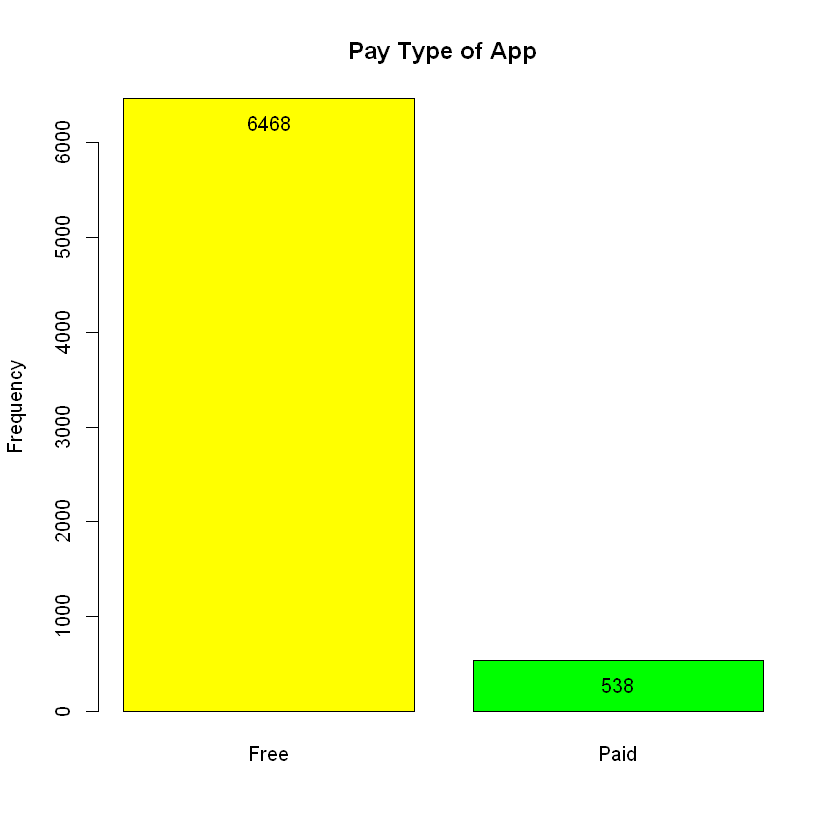

In [29]:
# use barplot shows number of free app and paid app
app7 = unique(app6[c("App","Type")])
b = barplot(table(app7$Type), main="Pay Type of App", 
   ylab="Frequency",col=c("yellow","green"))
text(x=b, y= table(app7$Type)-250, labels=as.character(table(app7$Type)))

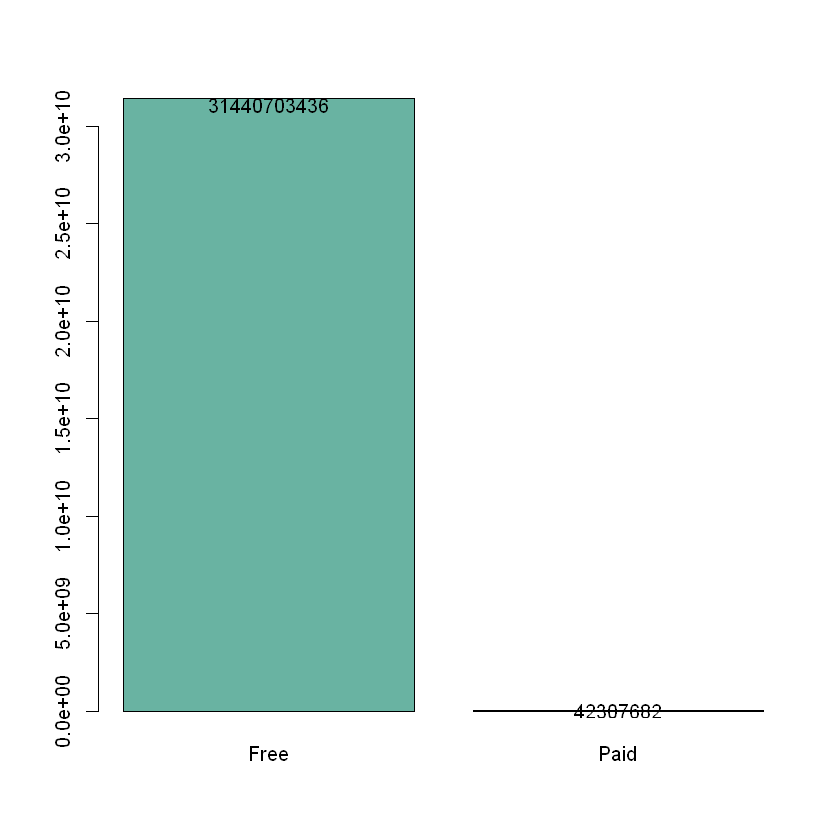

In [30]:
# use bar plot shows total install of free app and paid app
app7 = unique(app6[c("App","Installs","Type")])
total = aggregate(as.numeric(app7$Installs), by=list(Type=app7$Type), FUN=sum)
b = barplot(height=total$x, names=total$Type, col="#69b3a2")
text(x=b, y= c(total$x[1]-300000000,total$x[2]), labels=as.character(total$x))

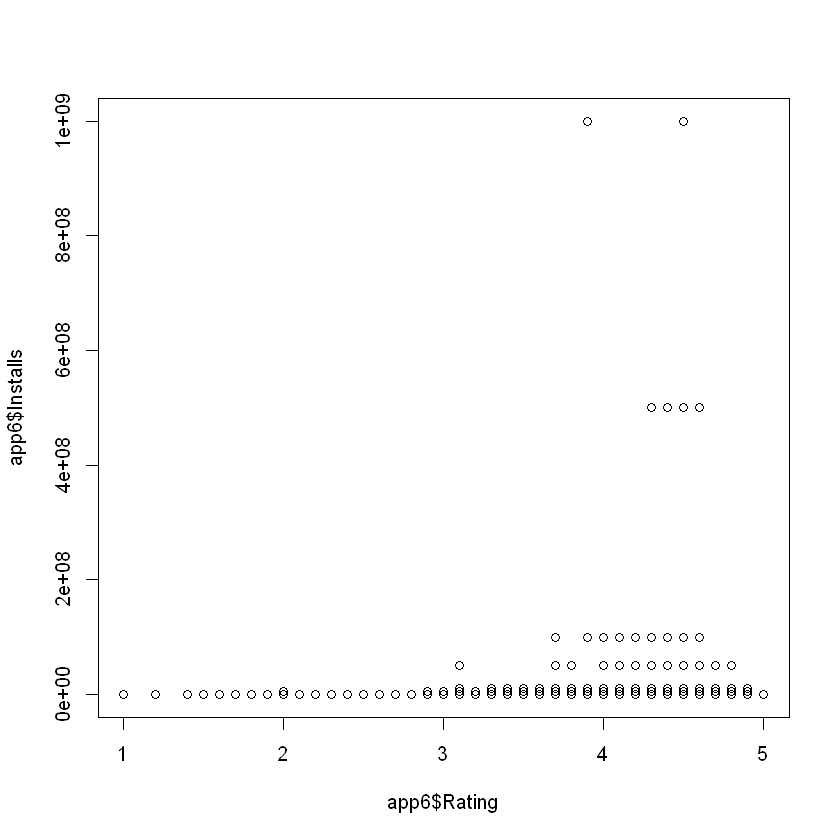

In [32]:
# use diagram shows distribute between rating and install
plot(app6$Rating,app6$Installs)

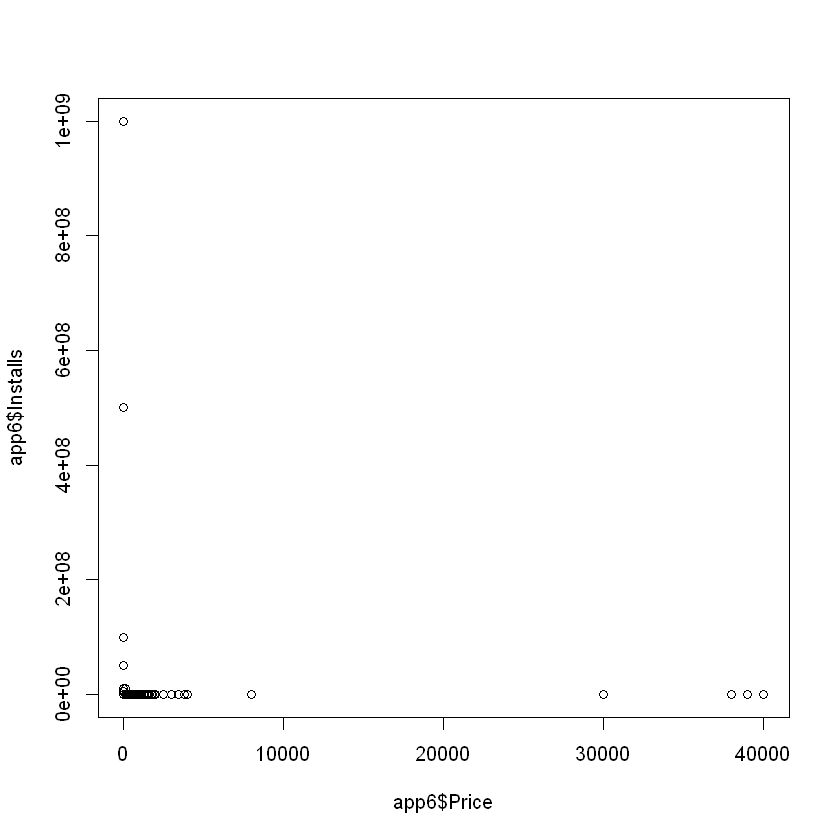

In [33]:
# use diagram shows distribute between price and install
plot(app6$Price,app6$Installs)

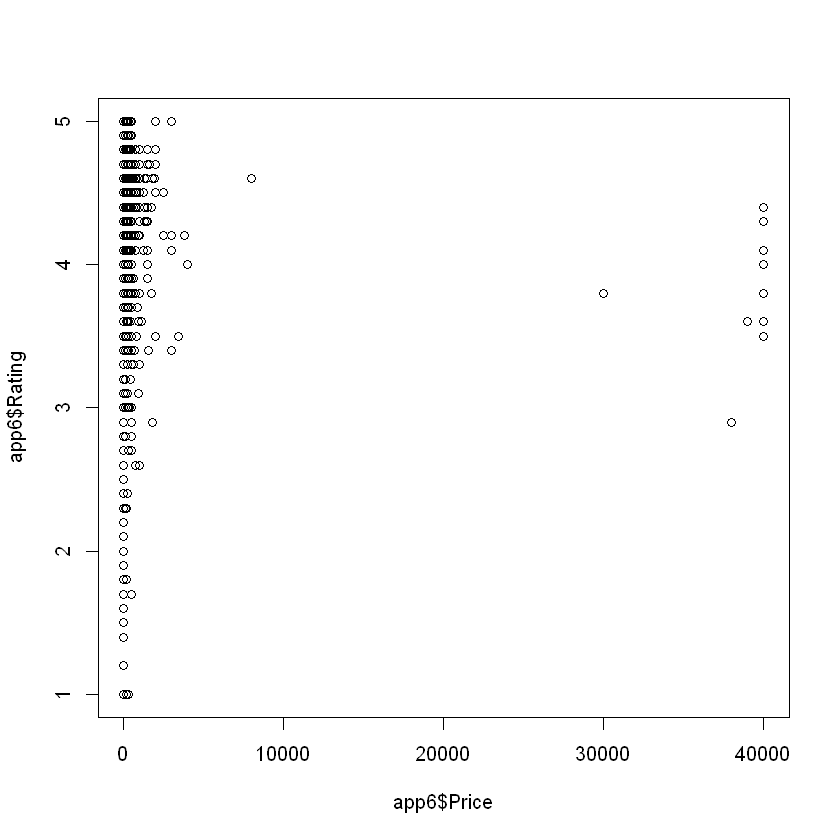

In [34]:
# use diagram shows distribute between price and rating
plot(app6$Price,app6$Rating)

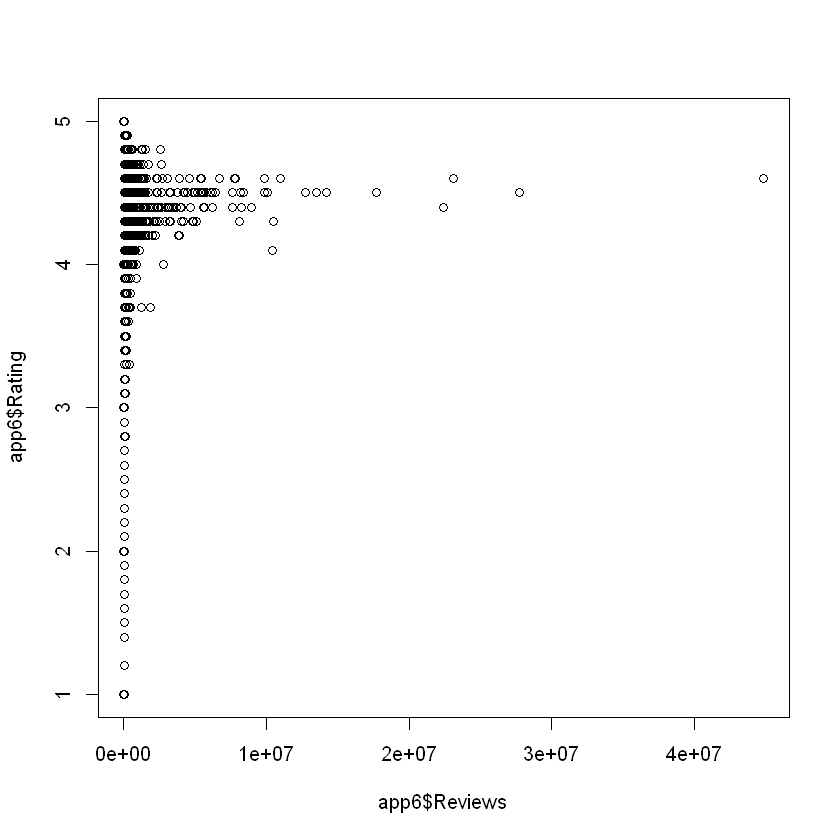

In [35]:
# use diagram shows distribute between rating and review
plot(app6$Reviews,app6$Rating)

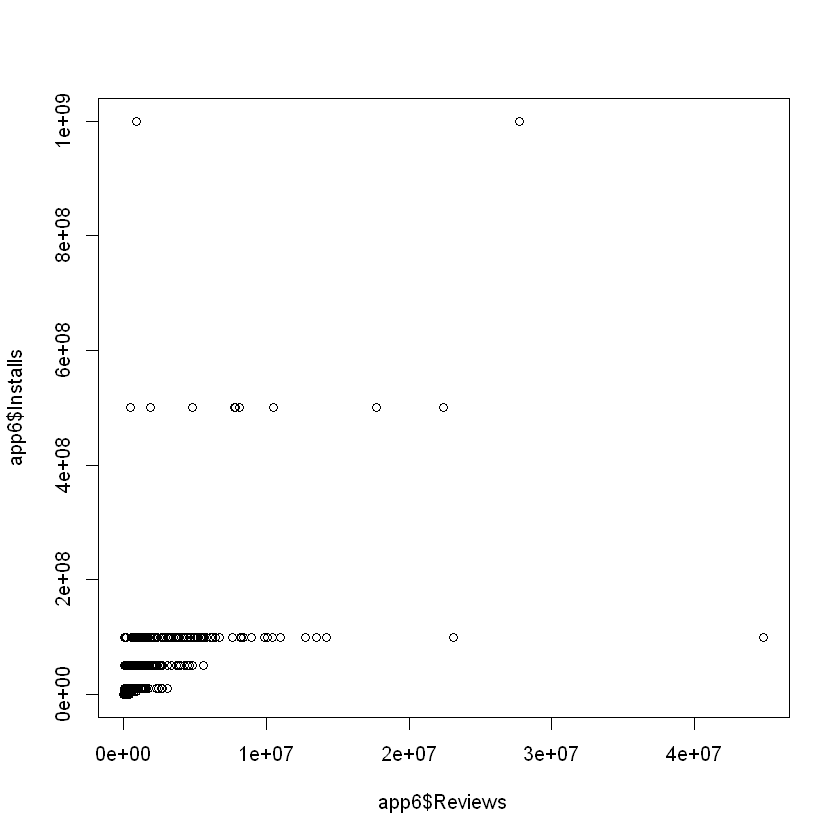

In [36]:
# use diagram shows distribute between review and install
plot(app6$Reviews,app6$Installs)

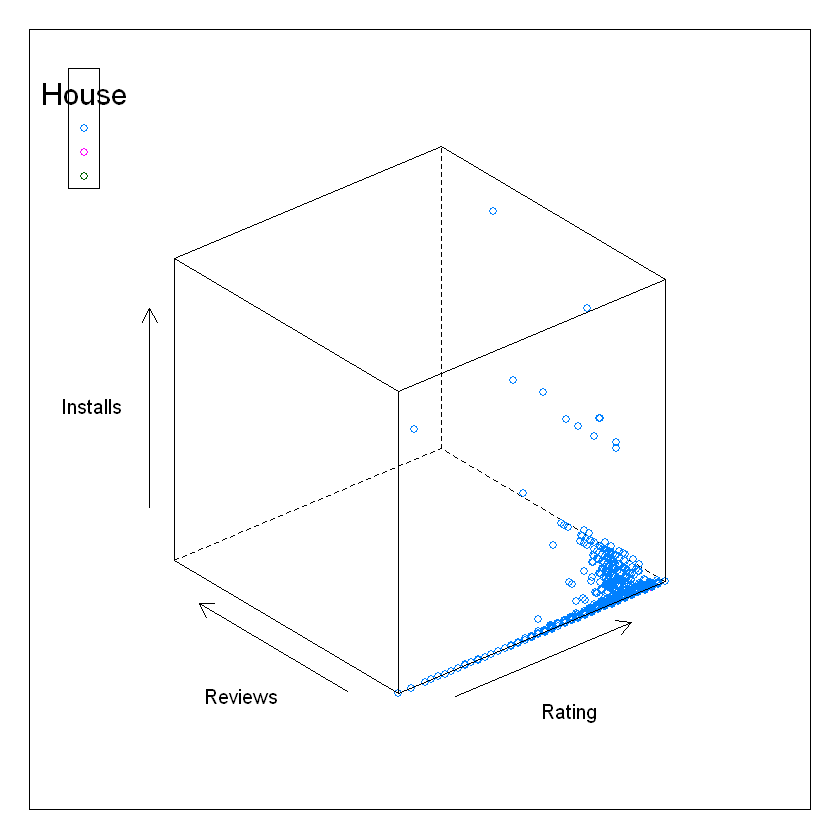

In [37]:
# use 3d diagram shows distribute between rating, review and install
library(lattice)
cloud(Installs ~ Rating * Reviews, data = app6,
groups = Type,
perspective = FALSE,
key = list(title = "House", x = .05, y=.95, border = TRUE,
points = Rows(trellis.par.get("superpose.symbol"), 1:3)
))

In [38]:
str(merge)

'data.frame':	45010 obs. of  17 variables:
 $ App                   : chr  "10 Best Foods for You" "10 Best Foods for You" "10 Best Foods for You" "10 Best Foods for You" ...
 $ Category              : chr  "HEALTH_AND_FITNESS" "HEALTH_AND_FITNESS" "HEALTH_AND_FITNESS" "HEALTH_AND_FITNESS" ...
 $ Rating                : num  4 4 4 4 4 4 4 4 4 4 ...
 $ Reviews               : num  2490 2490 2490 2490 2490 2490 2490 2490 2490 2490 ...
 $ Size                  : num  3.8 3.8 3.8 3.8 3.8 3.8 3.8 3.8 3.8 3.8 ...
 $ Installs              : num  5e+05 5e+05 5e+05 5e+05 5e+05 5e+05 5e+05 5e+05 5e+05 5e+05 ...
 $ Type                  : chr  "Free" "Free" "Free" "Free" ...
 $ Price                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Content.Rating        : chr  "Everyone 10+" "Everyone 10+" "Everyone 10+" "Everyone 10+" ...
 $ Genres                : chr  "Health & Fitness" "Health & Fitness" "Health & Fitness" "Health & Fitness" ...
 $ Last.Updated          : chr  "February 17, 2017" "February 1

## Form Big Idea
### This dataset shows details of app and user reviews for the google store app
### For app details:
#### Application name
#### Category the app belongs to
#### Overall user rating of the app, maximum 5, minimum 0
#### Number of user reviews for the app
#### Size of the app, use mb as unit
#### Number of user downloads/installs for the app
#### Paid or free
#### Price of the app
#### Age group the app is targeted at - Children / Mature 21+ / Adult
#### An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
#### Date when the app was last updated on Play Store
#### Current version of the app available on Play Store
#### Min required Android version 
### For user review details:
#### Name of app
#### User review text
#### Positive/Negative/Neutral 
#### Sentiment polarity score, maximum 1, minimum 0
#### Sentiment subjectivity score, maximum 1, minimum 0

### In these dataset, we can easy to understand informations of apllications and users evaluation, according those information, my big idea is to find what kind of application is most popular for user.
### The audience of this big idea is application developer.
### This is a good opportunities allowed developers to develop their own application according information chats

# Visualisation Chat

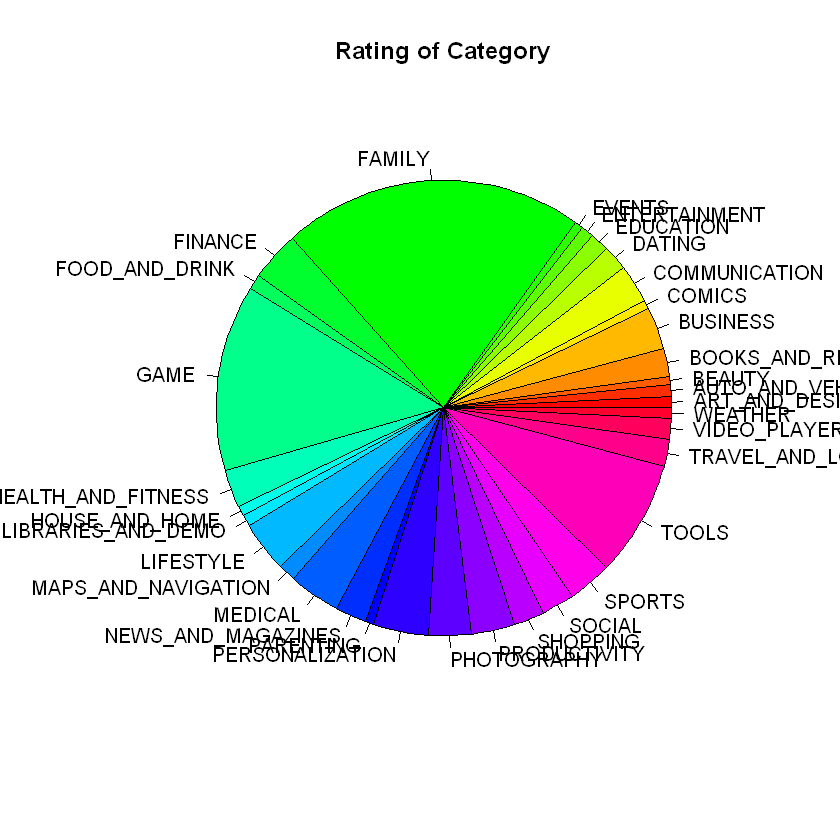

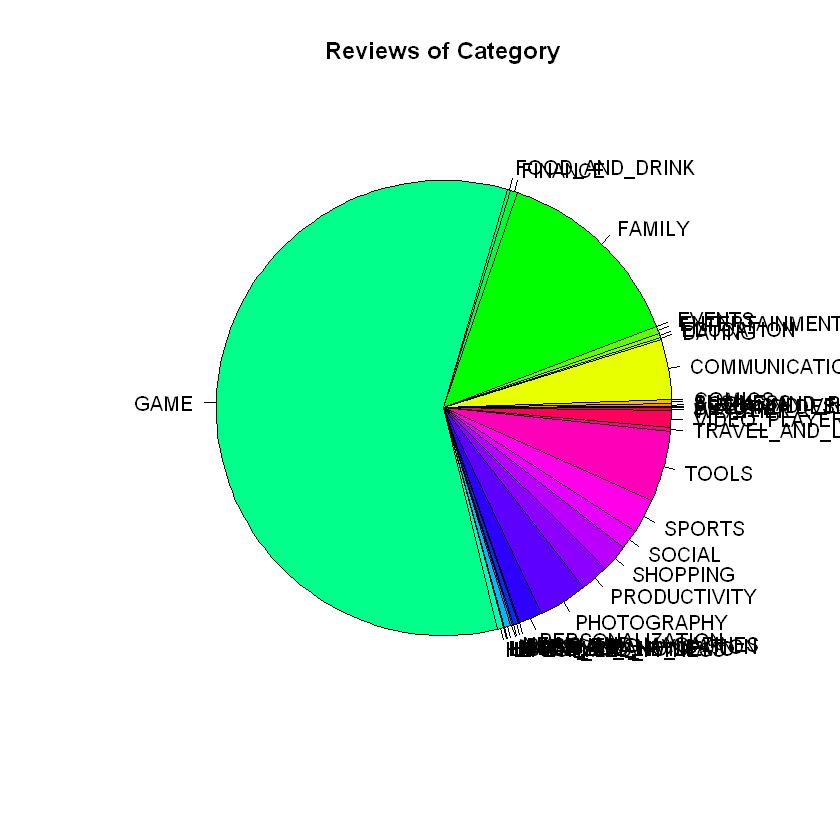

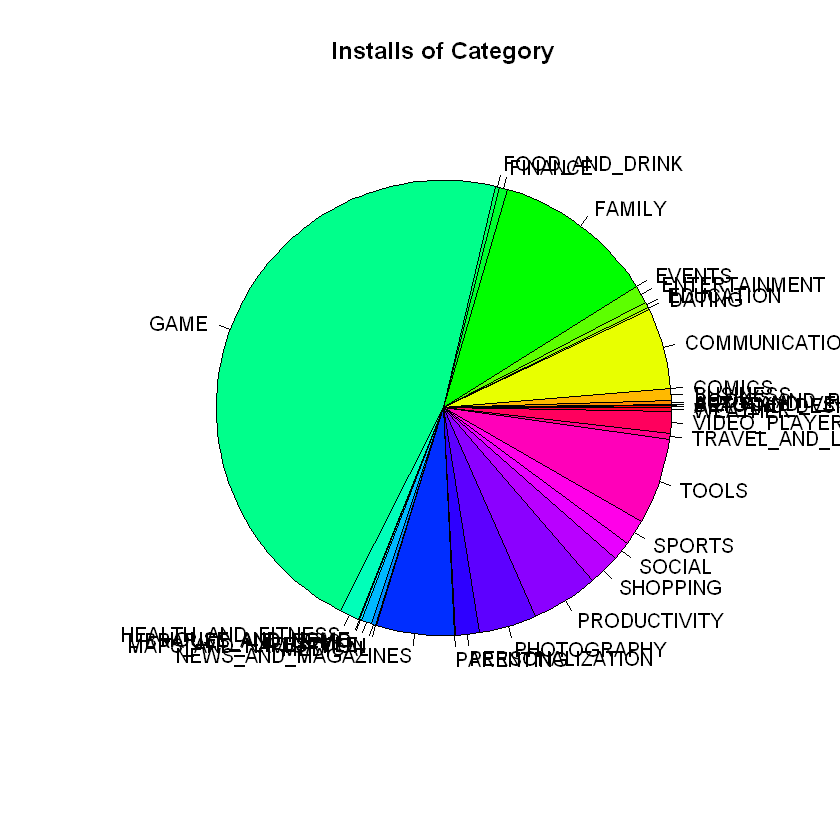

In [39]:
# for what kind of application is most popular for user is most depend rating, number of review and number of installs
#use pie chat shows what category of app is popular
v1 = unique(app6[c("App","Category","Rating","Reviews","Installs")])
r1 = aggregate(v1$Rating, by=list(Type=v1$Category), FUN=sum)
r2 = aggregate(v1$Reviews, by=list(Type=v1$Category), FUN=sum)
i1 = aggregate(v1$Installs, by=list(Type=v1$Category), FUN=sum)
#Rating of Category
pct <- round(r1$x/sum(r1$x)*100)
lbls <- paste(r1$Type, pct) # add percents to labels 
lbls <- paste(r1$Type,"%",sep="") # ad % to labels 
pie(r1$x,labels = r1$Type, col=rainbow(length(r1$Type)),
   main="Rating of Category")
#Reviews of Category
pct <- round(r2$x/sum(r2$x)*100)
lbls <- paste(r2$Type, pct) # add percents to labels 
lbls <- paste(r2$Type,"%",sep="") # ad % to labels 
pie(r2$x,labels = r2$Type, col=rainbow(length(r2$Type)),
   main="Reviews of Category")

#Installs of Category
pct <- round(i1$x/sum(i1$x)*100)
lbls <- paste(i1$Type, pct) # add percents to labels 
lbls <- paste(i1$Type,"%",sep="") # ad % to labels 
pie(i1$x,labels = i1$Type, col=rainbow(length(i1$Type)),
   main="Installs of Category")

## On the base of pie chat from above, we understand the most popular type of application are game and family, and game have more installs and reviews.

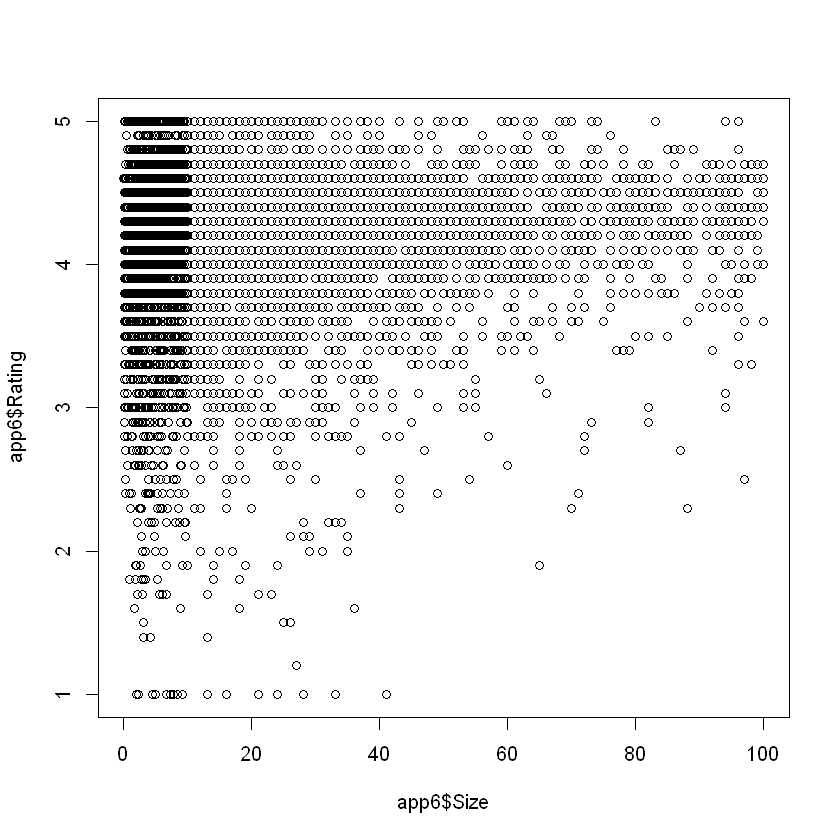

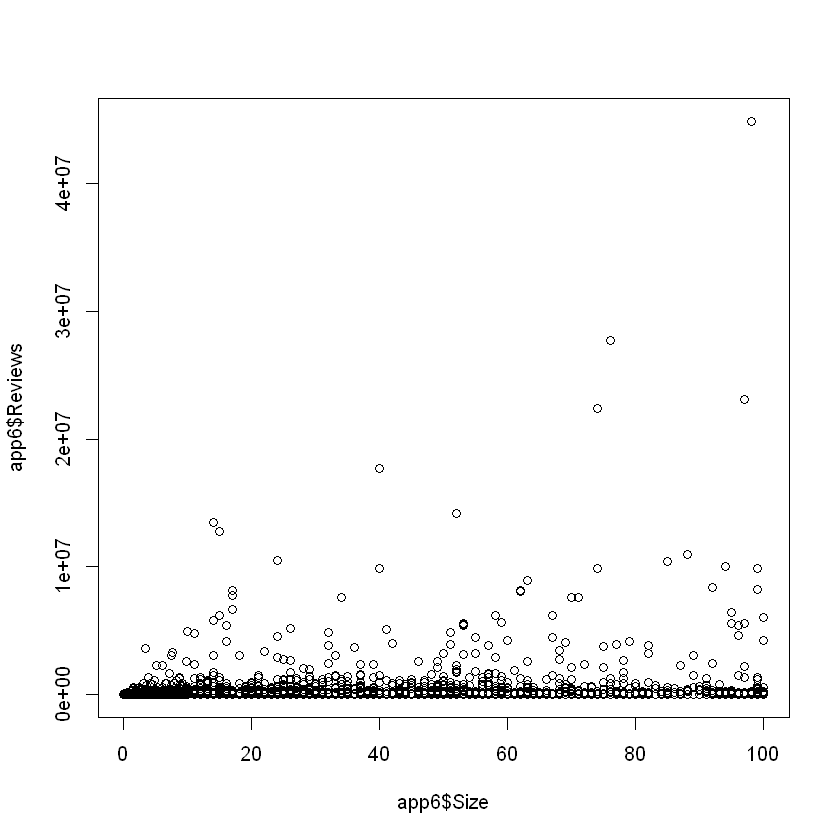

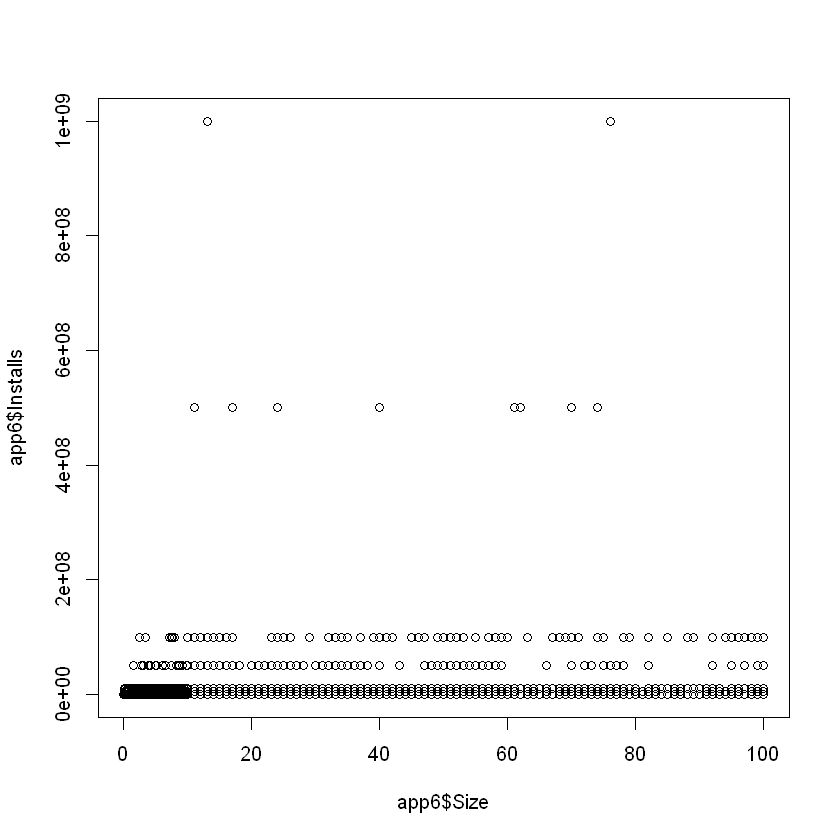

In [40]:
# use plot shows distribute of size for rating, review and installs
plot(app6$Size,app6$Rating)
plot(app6$Size,app6$Reviews)
plot(app6$Size,app6$Installs)

## On the base of pie chat from above, we understand high rating, reviews and installs of application is not been mush changes, but the high size of application is alomost hight rating.

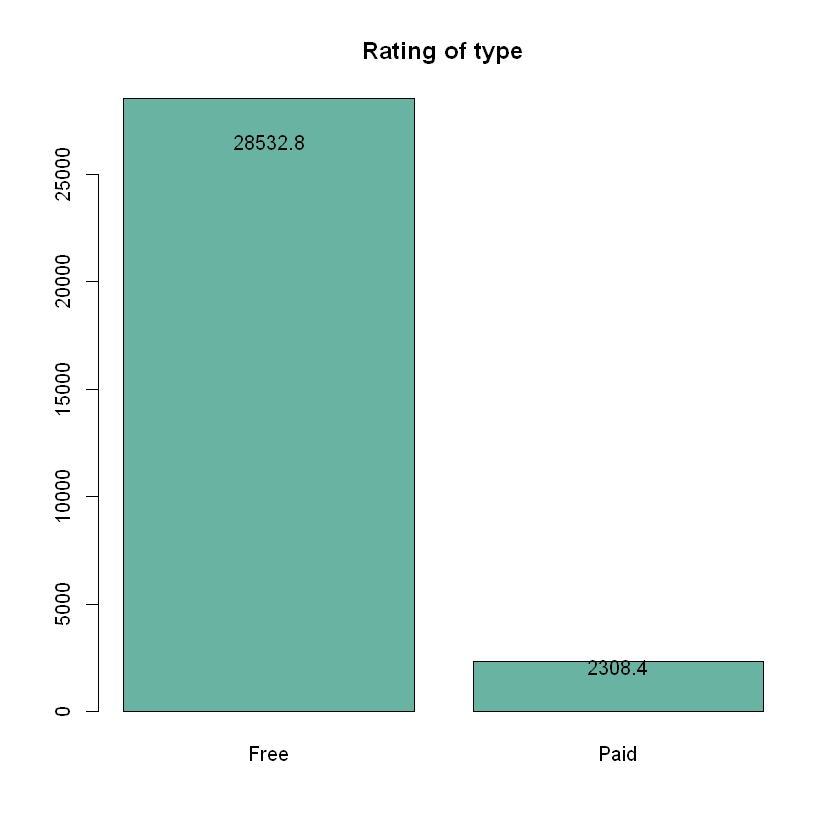

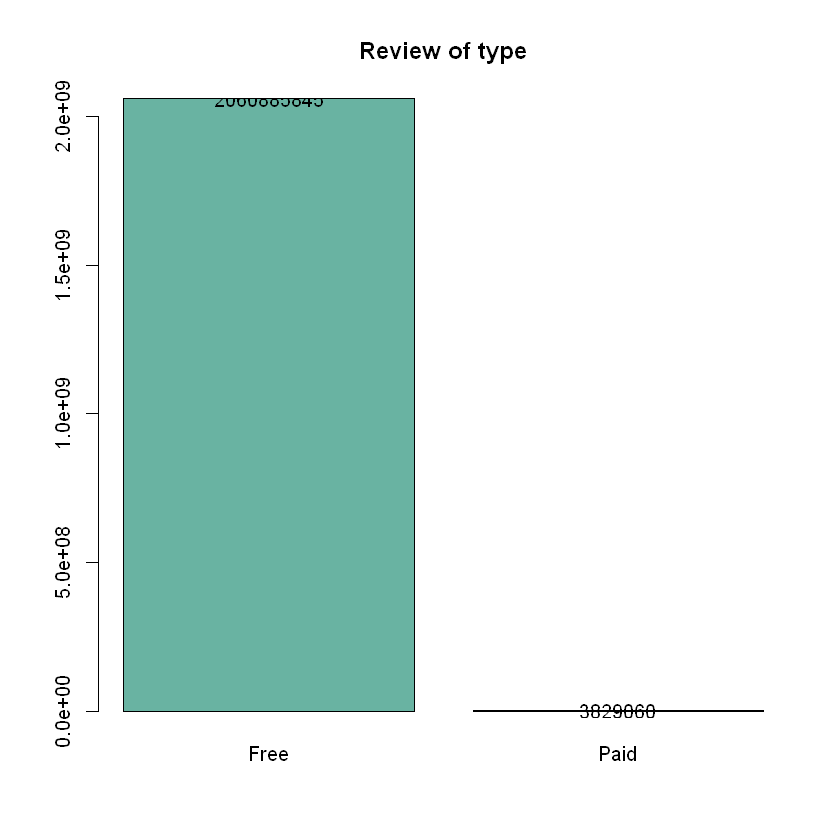

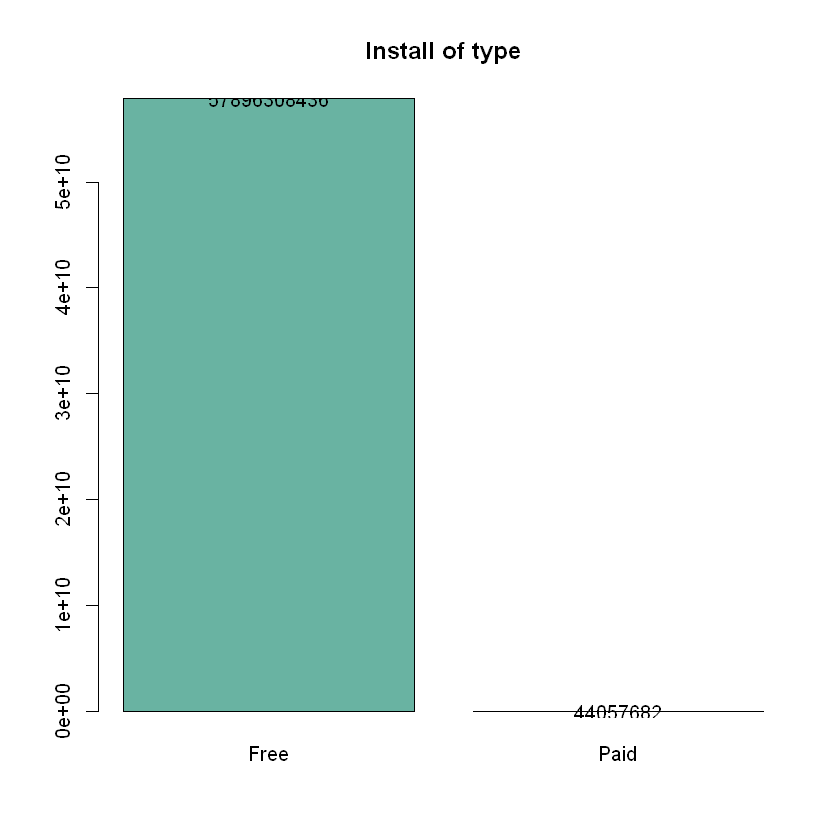

In [41]:
# use barplot shows total rating, review and installs for free type and paid type
v1 = unique(app6[c("App","Type","Rating","Reviews","Installs")])
r1 = aggregate(v1$Rating, by=list(Type=v1$Type), FUN=sum)
r2 = aggregate(v1$Reviews, by=list(Type=v1$Type), FUN=sum)
i1 = aggregate(v1$Installs, by=list(Type=v1$Type), FUN=sum)
b = barplot(height=r1$x, main="Rating of type",names=r1$Type, col="#69b3a2")
text(x=b, y= c(r1$x[1]-2000,r1$x[2]-200), labels=as.character(r1$x))

b = barplot(height=r2$x, main="Review of type",names=r2$Type, col="#69b3a2")
text(x=b, y= c(r2$x[1]-2000,r2$x[2]-200), labels=as.character(r2$x))

b = barplot(height=i1$x, main="Install of type",names=i1$Type, col="#69b3a2")
text(x=b, y= c(i1$x[1]-2000,i1$x[2]-200), labels=as.character(i1$x))

## On the base of pie chat from above, we understand high most people like free application.

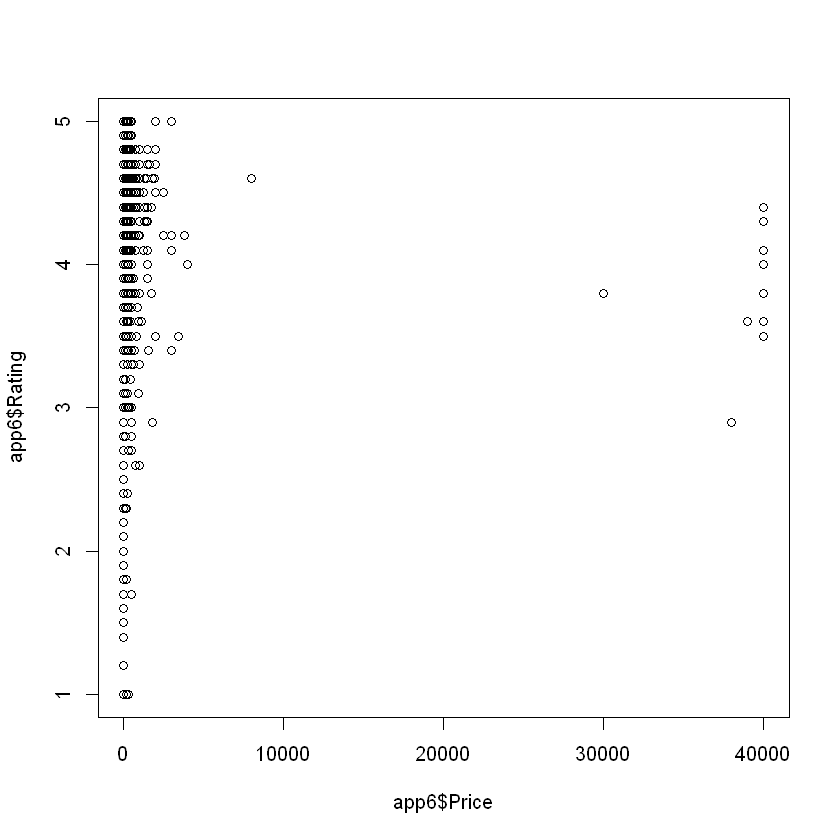

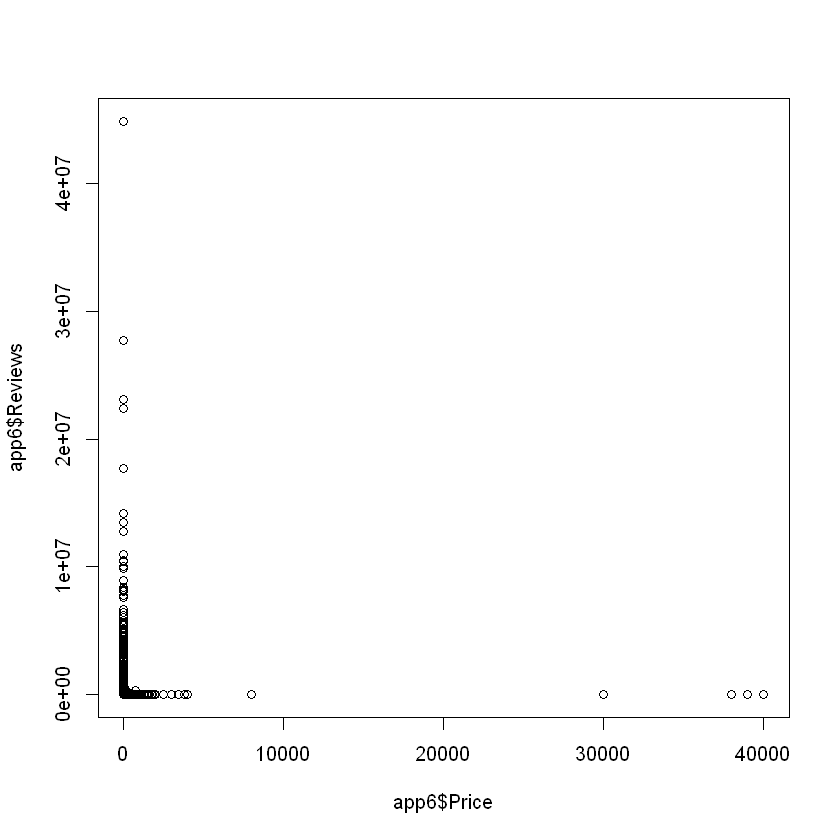

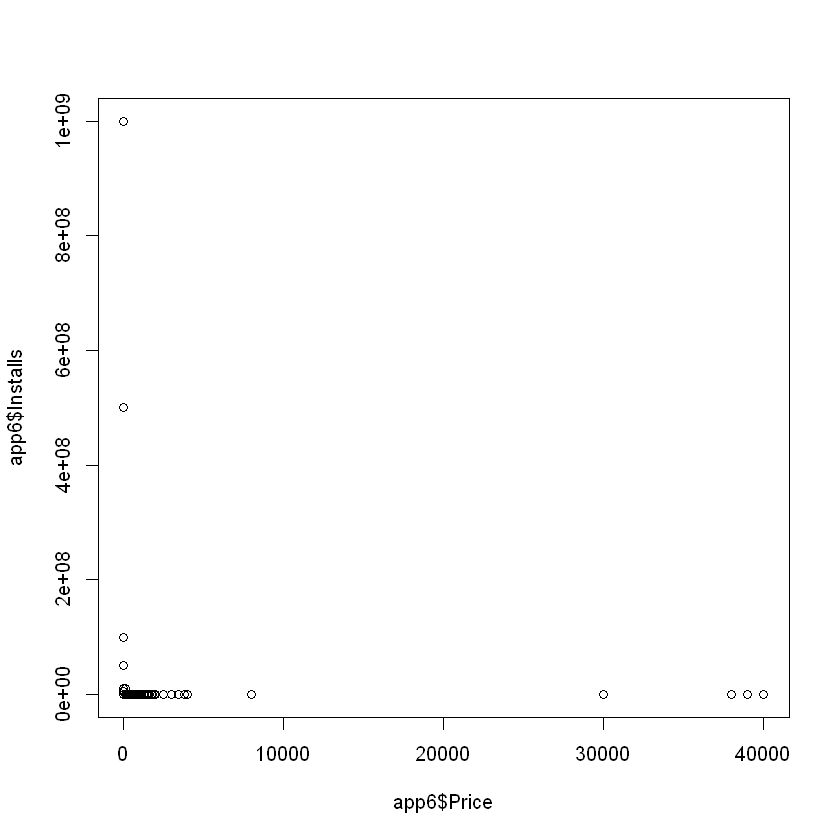

In [42]:
# use plot shows distribute of Price for rating, review and installs
plot(app6$Price,app6$Rating)
plot(app6$Price,app6$Reviews)
plot(app6$Price,app6$Installs)

## On the base of plot from above, we realize most application is free, for application which is not free, about 0-4000 dollar have high rating.

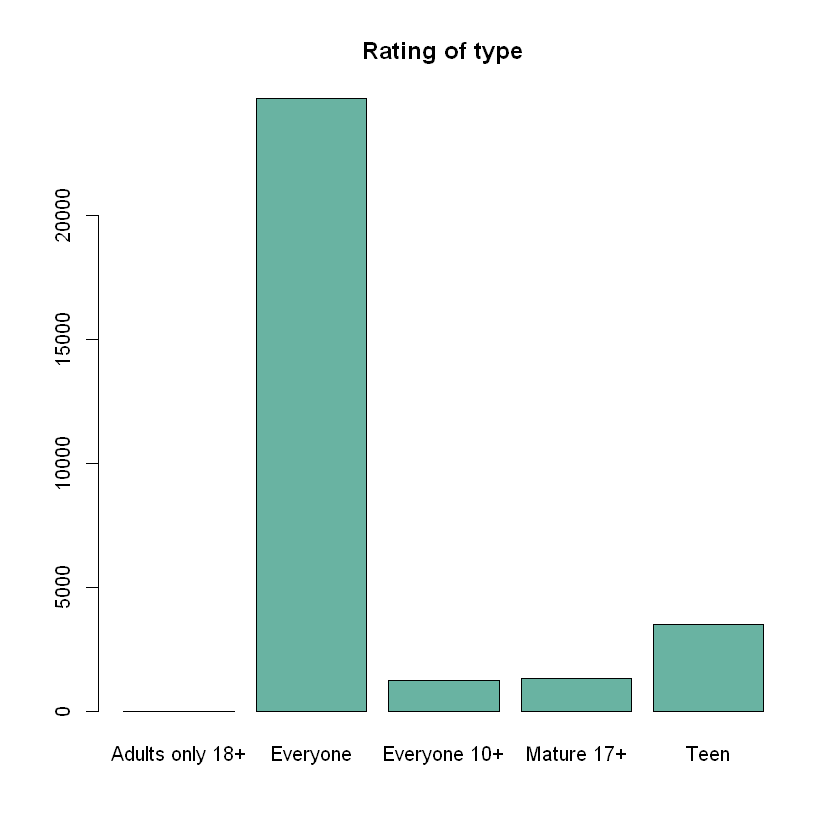

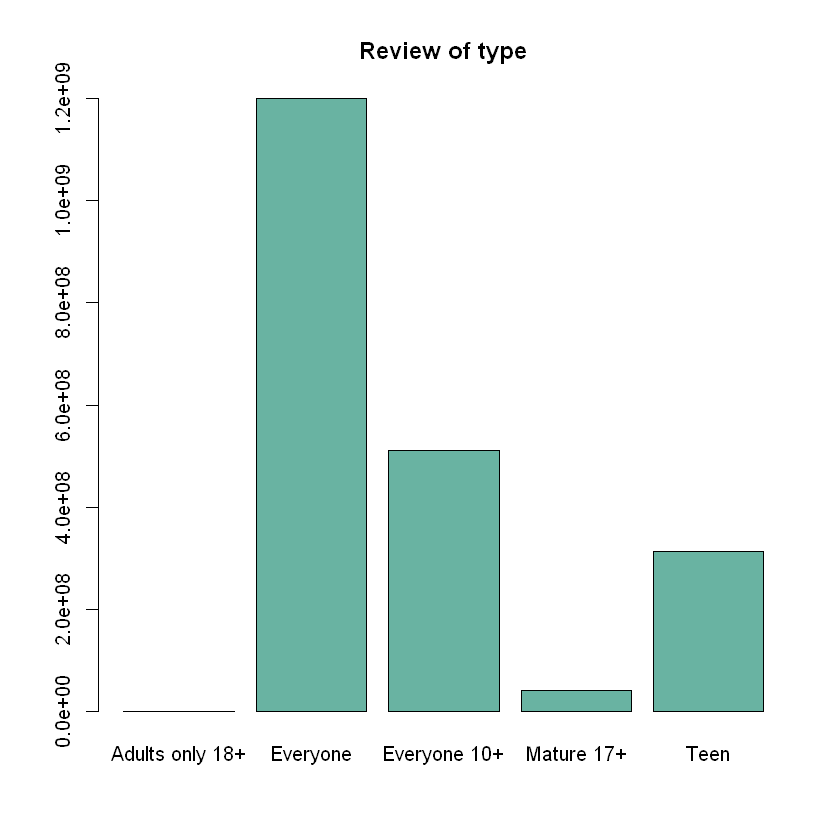

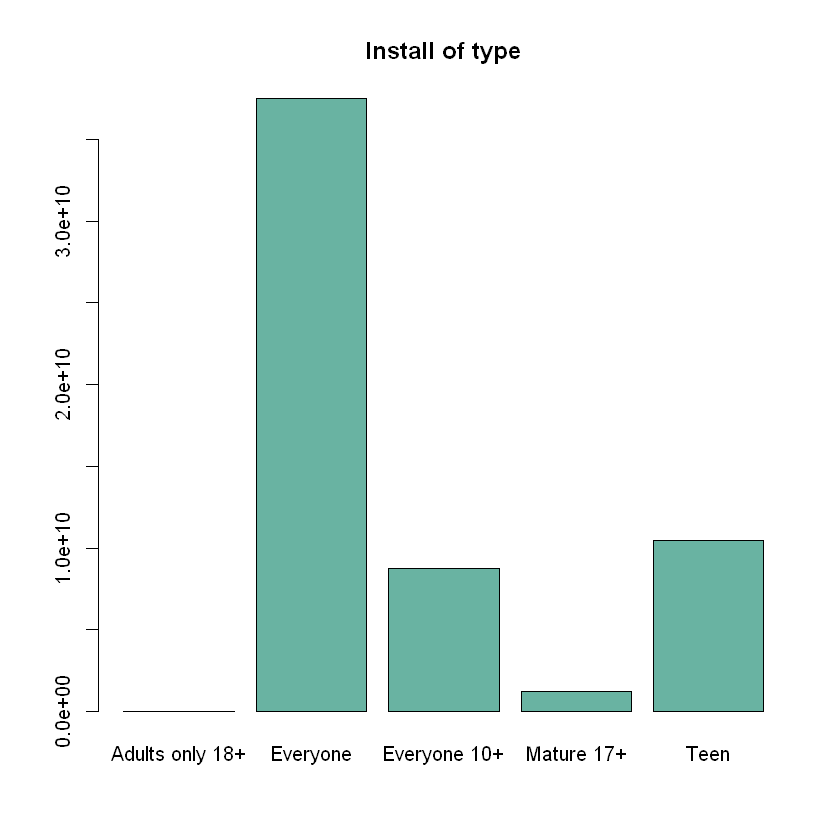

In [43]:
# use barplot shows total rating, review and installs for content rating

v1 = unique(app6[c("App","Content.Rating","Rating","Reviews","Installs")])
r1 = aggregate(v1$Rating, by=list(Type=v1$Content.Rating), FUN=sum)
r2 = aggregate(v1$Reviews, by=list(Type=v1$Content.Rating), FUN=sum)
i1 = aggregate(v1$Installs, by=list(Type=v1$Content.Rating), FUN=sum)

barplot(height=r1$x, main="Rating of type",names=r1$Type, col="#69b3a2")


barplot(height=r2$x, main="Review of type",names=r2$Type, col="#69b3a2")


barplot(height=i1$x, main="Install of type",names=i1$Type, col="#69b3a2")


## On the base of barplot from above, we realize the popular applications are best suit for everyone.

In [44]:
unique(app6$Android.Ver)

[1] "4.0.3 and up"       "4.2 and up"         "4.4 and up"        
 [4] "2.3 and up"         "3.0 and up"         "4.1 and up"        
 [7] "4.0 and up"         "2.2 and up"         "5.0 and up"        
[10] "6.0 and up"         "1.6 and up"         "2.1 and up"        
[13] "1.5 and up"         "7.0 and up"         "4.3 and up"        
[16] "4.0.3 - 7.1.1"      "2.0 and up"         "2.3.3 and up"      
[19] "Varies with device" "3.2 and up"         "4.4W and up"       
[22] "5.1 and up"         "7.1 and up"         "7.0 - 7.1.1"       
[25] "8.0 and up"         "5.0 - 8.0"          "3.1 and up"        
[28] "2.0.1 and up"       "4.1 - 7.1.1"        "NaN"               
[31] "5.0 - 6.0"          "1.0 and up"

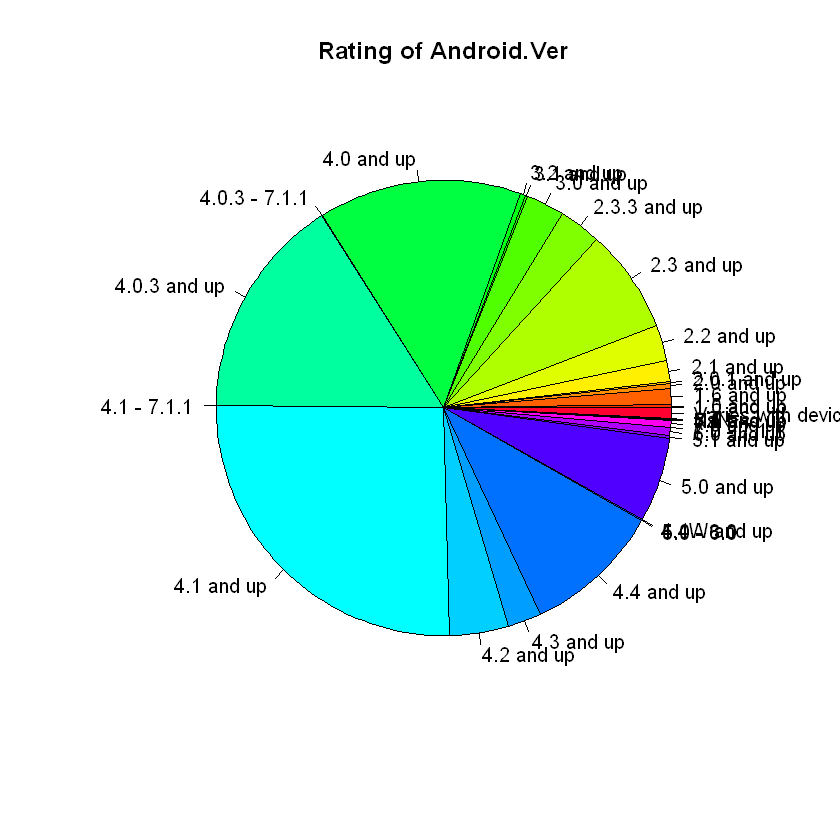

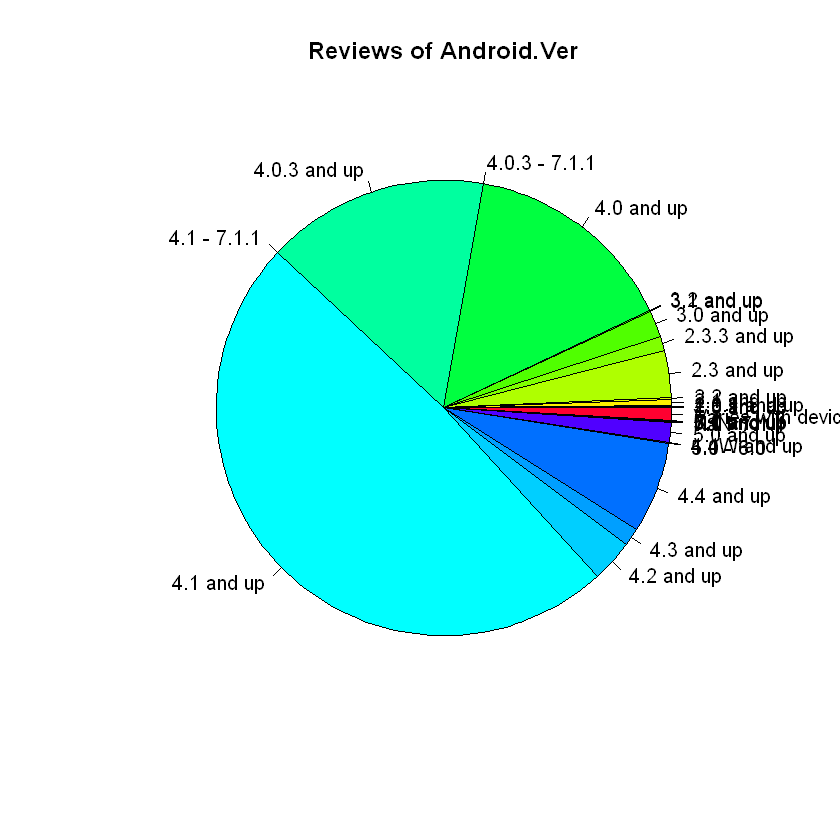

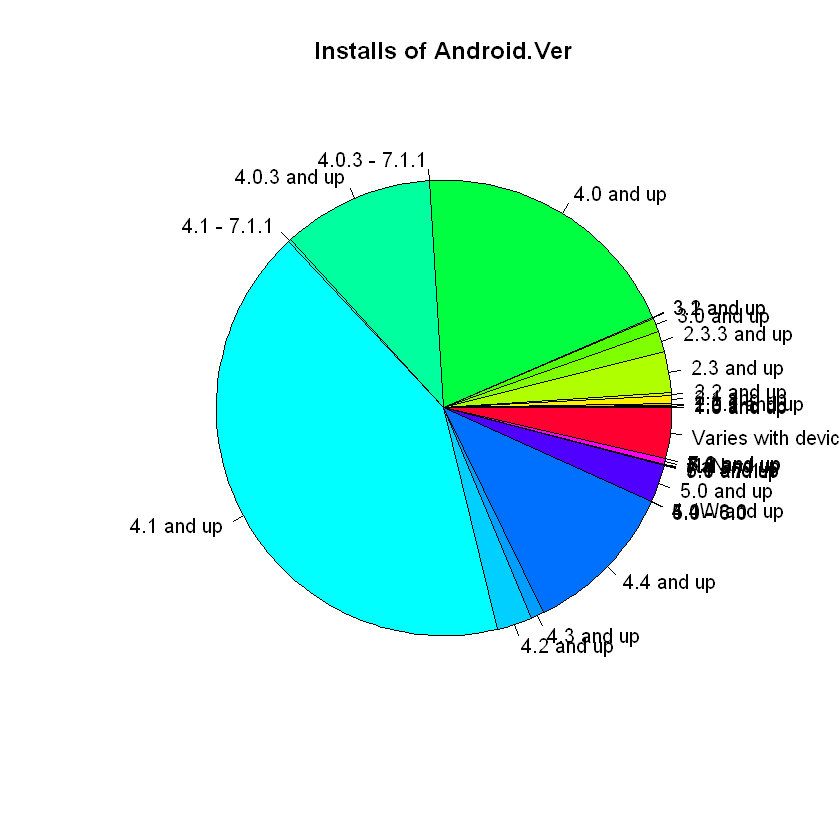

In [45]:
#use pie chat shows which android version of app is popular
v1 = unique(app6[c("App","Android.Ver","Rating","Reviews","Installs")])
r1 = aggregate(v1$Rating, by=list(Type=v1$Android.Ver), FUN=sum)
r2 = aggregate(v1$Reviews, by=list(Type=v1$Android.Ver), FUN=sum)
i1 = aggregate(v1$Installs, by=list(Type=v1$Android.Ver), FUN=sum)
#Rating of Android.Ver
pct <- round(r1$x/sum(r1$x)*100)
lbls <- paste(r1$Type, pct) # add percents to labels 
lbls <- paste(r1$Type,"%",sep="") # ad % to labels 
pie(r1$x,labels = r1$Type, col=rainbow(length(r1$Type)),
   main="Rating of Android.Ver")
#Reviews of Android.Ver
pct <- round(r2$x/sum(r2$x)*100)
lbls <- paste(r2$Type, pct) # add percents to labels 
lbls <- paste(r2$Type,"%",sep="") # ad % to labels 
pie(r2$x,labels = r2$Type, col=rainbow(length(r2$Type)),
   main="Reviews of Android.Ver")

#Installs of Android.Ver
pct <- round(i1$x/sum(i1$x)*100)
lbls <- paste(i1$Type, pct) # add percents to labels 
lbls <- paste(i1$Type,"%",sep="") # ad % to labels 
pie(i1$x,labels = i1$Type, col=rainbow(length(i1$Type)),
   main="Installs of Android.Ver")

## On the base of barplot from above, we realize the popular applications are use android version 4.1 and up

In [46]:
str(merge)

'data.frame':	45010 obs. of  17 variables:
 $ App                   : chr  "10 Best Foods for You" "10 Best Foods for You" "10 Best Foods for You" "10 Best Foods for You" ...
 $ Category              : chr  "HEALTH_AND_FITNESS" "HEALTH_AND_FITNESS" "HEALTH_AND_FITNESS" "HEALTH_AND_FITNESS" ...
 $ Rating                : num  4 4 4 4 4 4 4 4 4 4 ...
 $ Reviews               : num  2490 2490 2490 2490 2490 2490 2490 2490 2490 2490 ...
 $ Size                  : num  3.8 3.8 3.8 3.8 3.8 3.8 3.8 3.8 3.8 3.8 ...
 $ Installs              : num  5e+05 5e+05 5e+05 5e+05 5e+05 5e+05 5e+05 5e+05 5e+05 5e+05 ...
 $ Type                  : chr  "Free" "Free" "Free" "Free" ...
 $ Price                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Content.Rating        : chr  "Everyone 10+" "Everyone 10+" "Everyone 10+" "Everyone 10+" ...
 $ Genres                : chr  "Health & Fitness" "Health & Fitness" "Health & Fitness" "Health & Fitness" ...
 $ Last.Updated          : chr  "February 17, 2017" "February 1

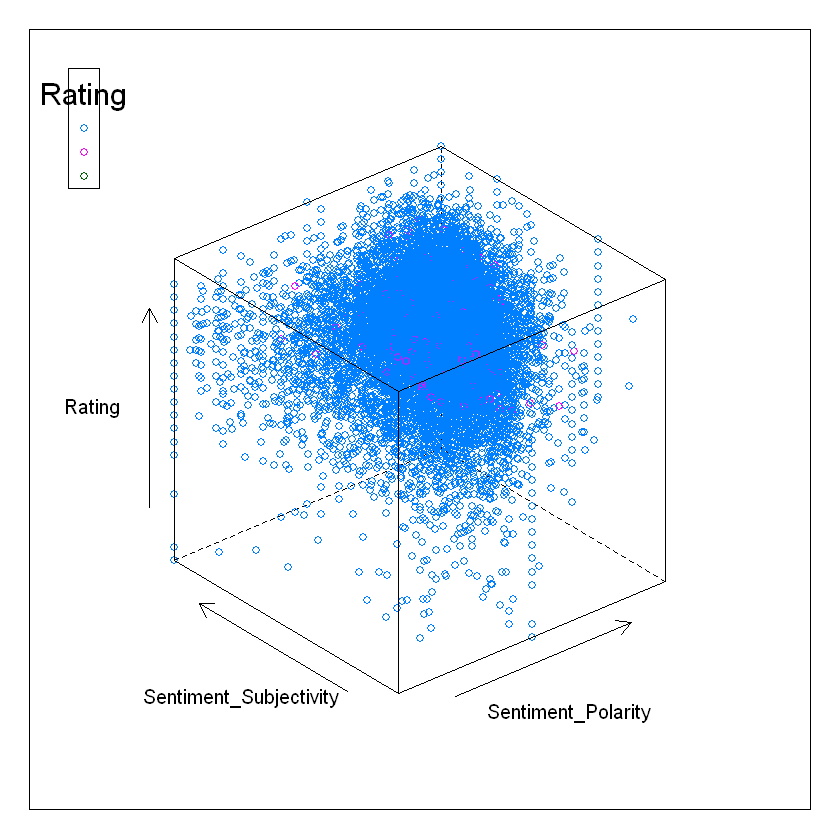

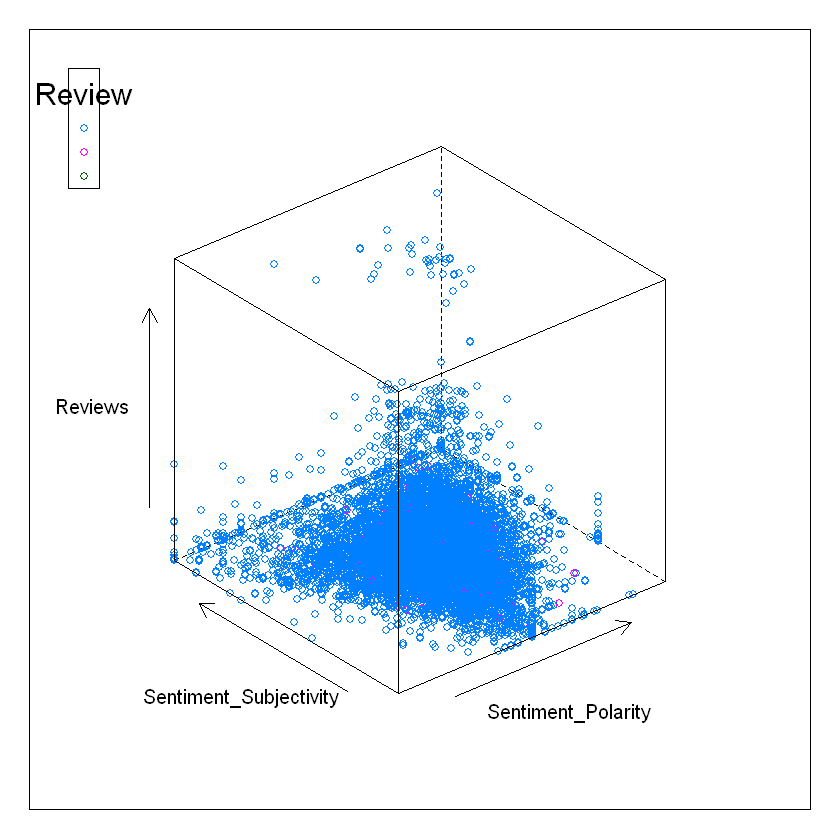

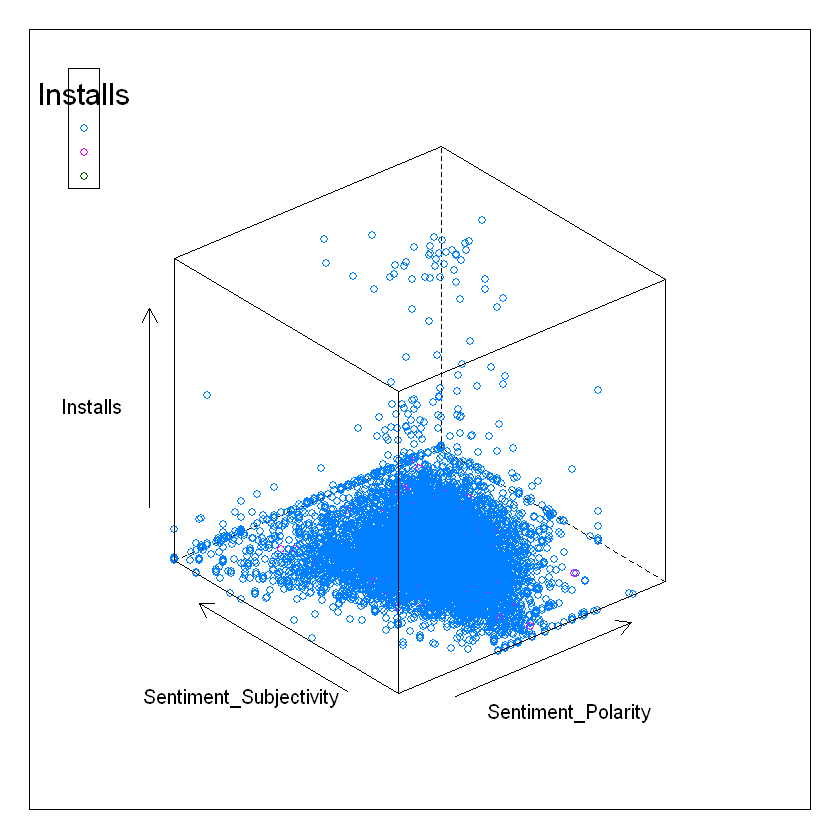

In [47]:
#use 3d diagram shows how polarity and subjectivity sentiment can effect overall rating, reviews and installs.

#effect overall rating
cloud(Rating ~ Sentiment_Polarity * Sentiment_Subjectivity, data = merge,
groups = Type,
perspective = FALSE,
key = list(title = "Rating", x = .05, y=.95, border = TRUE,
points = Rows(trellis.par.get("superpose.symbol"), 1:3)
))
# effect reviews
cloud(Reviews ~ Sentiment_Polarity * Sentiment_Subjectivity, data = merge,
groups = Type,
perspective = FALSE,
key = list(title = "Review", x = .05, y=.95, border = TRUE,
points = Rows(trellis.par.get("superpose.symbol"), 1:3)
))
# effect installs
cloud(Installs ~ Sentiment_Polarity * Sentiment_Subjectivity, data = merge,
groups = Type,
perspective = FALSE,
key = list(title = "Installs", x = .05, y=.95, border = TRUE,
points = Rows(trellis.par.get("superpose.symbol"), 1:3)
))

## On the base of barplot from above, we realize the most popular applications are proportional to the average of polarity and subjectivity sentiment.

[1] 60000

Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, tolower):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"


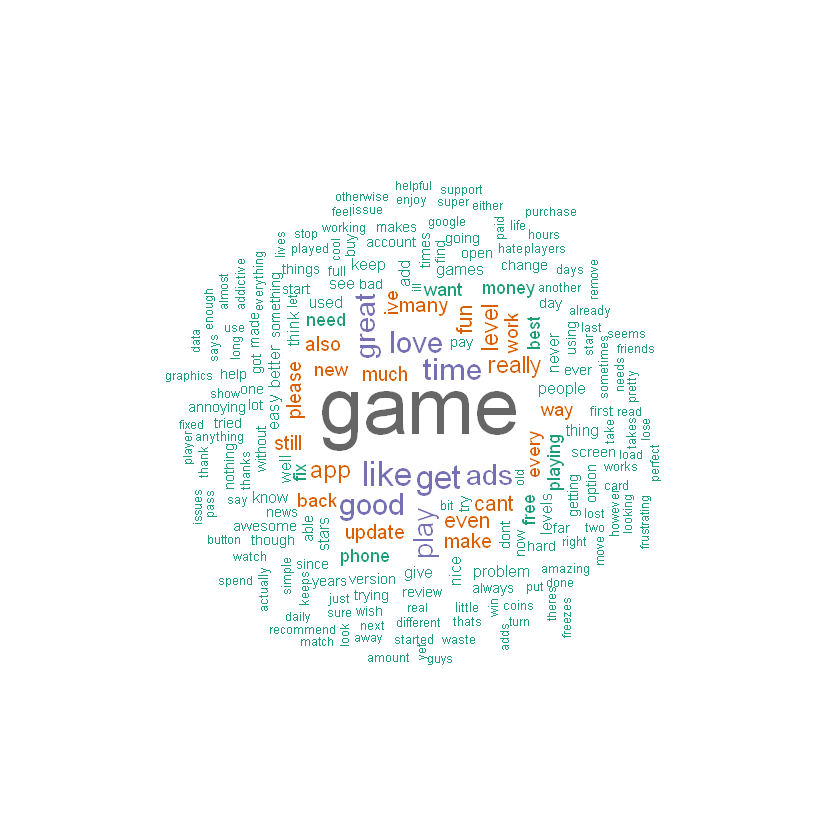

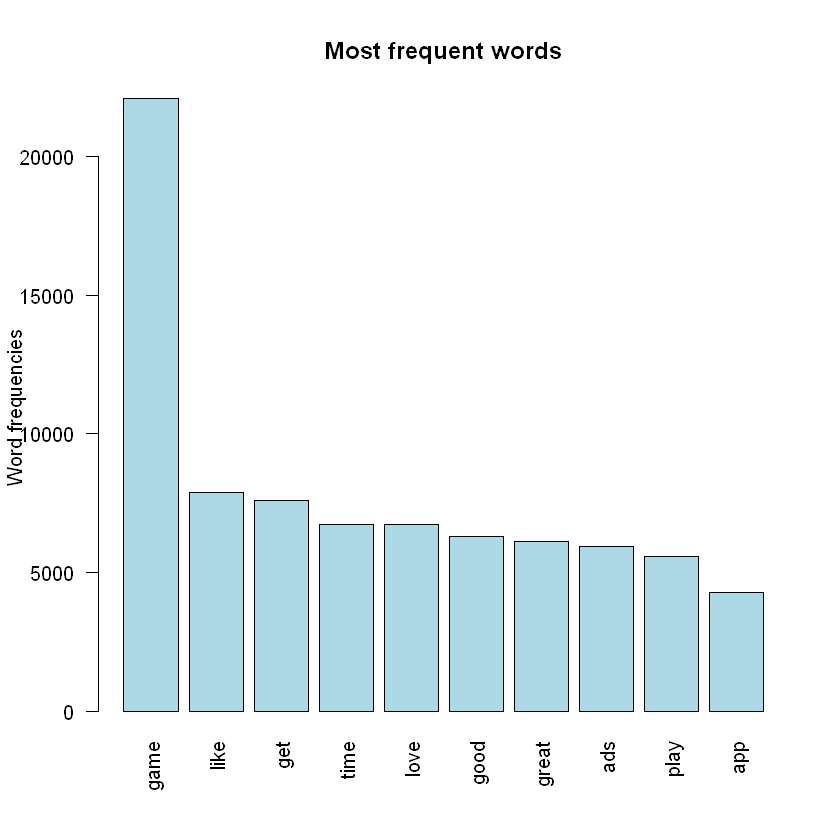

In [48]:
# use word freqency to research user review
memory.limit(60000)

    #process word
    docs <- Corpus(VectorSource(merge$Translated_Review))
    
    docs <- tm_map(docs, removeNumbers)
    docs <- tm_map(docs,removePunctuation)
    docs <- tm_map(docs, tolower)
    docs <- tm_map(docs, removeWords,stopwords("english"))
    
    dtm <- TermDocumentMatrix(docs)
    m <- as.matrix(dtm)
    v <- sort(rowSums(m),decreasing=TRUE)
    d <- data.frame(word = names(v),freq=v)
 

   )
    
    set.seed(1234)# This makes the cloud reproducable.

    wordclod = wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))
    
    plot = barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,
        col ="lightblue", main ="Most frequent words",
        ylab = "Word frequencies")





In [54]:
# display top 20 frequency word
head(d, 20)
# display top 1000 frequency word
findFreqTerms(dtm, lowfreq = 1000)

,word,freq
,<fct>,<dbl>
game,game,22092
like,like,7885
get,get,7614
time,time,6749
love,love,6724
good,good,6319
great,great,6114
ads,ads,5949
play,play,5598


[1] "best"      "stars"     "awesome"   "ever"      "love"      "like"     
  [7] "good"      "far"       "lost"      "find"      "nothing"   "really"   
 [13] "app"       "make"      "phone"     "think"     "help"      "thing"    
 [19] "day"       "every"     "long"      "time"      "much"      "add"      
 [25] "great"     "please"    "first"     "nice"      "get"       "lot"      
 [31] "work"      "ads"       "easy"      "full"      "know"      "new"      
 [37] "review"    "update"    "now"       "amazing"   "also"      "free"     
 [43] "keep"      "see"       "well"      "got"       "bad"       "way"      
 [49] "never"     "things"    "going"     "cant"      "play"      "always"   
 [55] "just"      "still"     "one"       "need"      "able"      "getting"  
 [61] "trying"    "money"     "version"   "right"     "give"      "want"     
 [67] "fix"       "pay"       "hard"      "try"       "screen"    "dont"     
 [73] "option"    "problem"   "used"      "even"      "since"     "star"     
 [79] "level"     "many"      "open"      "makes"     "made"      "game"     
 [85] "ive"       "levels"    "fun"       "sometimes" "back"      "playing"  
 [91] "though"    "wish"      "another"   "using"     "years"     "little"   
 [97] "start"     "times"     "annoying"  "without"   "better"    "different"
[103] "something" "account"   "people"    "tried"     "news"      "google"   
[109] "change"    "games"     "played"    "buy"

In [56]:
# find relational words with top 20 frequency words
findAssocs(dtm, terms = "game", corlimit = 0.2)
findAssocs(dtm, terms = "like", corlimit = 0.2)
findAssocs(dtm, terms = "get", corlimit = 0.2)
findAssocs(dtm, terms = "time", corlimit = 0.2)
findAssocs(dtm, terms = "love", corlimit = 0.2)
findAssocs(dtm, terms = "good", corlimit = 0.2)
findAssocs(dtm, terms = "great", corlimit = 0.2)
findAssocs(dtm, terms = "ads", corlimit = 0.2)
findAssocs(dtm, terms = "play", corlimit = 0.2)
findAssocs(dtm, terms = "app", corlimit = 0.2)
findAssocs(dtm, terms = "really", corlimit = 0.2)
findAssocs(dtm, terms = "level", corlimit = 0.2)
findAssocs(dtm, terms = "even", corlimit = 0.2)
findAssocs(dtm, terms = "cant", corlimit = 0.2)
findAssocs(dtm, terms = "fun", corlimit = 0.2)
findAssocs(dtm, terms = "many", corlimit = 0.2)
findAssocs(dtm, terms = "much", corlimit = 0.2)
findAssocs(dtm, terms = "also", corlimit = 0.2)
findAssocs(dtm, terms = "please", corlimit = 0.2)
findAssocs(dtm, terms = "update", corlimit = 0.2)

$game
   play   level     fun playing     ads 
   0.30    0.25    0.25    0.22    0.21

$like
     kinds        azz   gamesget      named updatethis       holy 
      0.24       0.24       0.24       0.24       0.24       0.22

$get
numeric(0)

$time
every waste 
 0.26  0.22

$love
numeric(0)

$good
numeric(0)

$great
numeric(0)

$ads
           remove              many           waayyyy            bottom 
             0.37              0.35              0.33              0.31 
      continually              paid           removed            paying 
             0.27              0.26              0.26              0.25 
higherthanaverage            refund           waaaaay               fun 
             0.25              0.23              0.23              0.23 
        admongers            dammit          megaload       substituted 
             0.23              0.23              0.23              0.23 
           revise           seconds            amount             still 
             0.23              0.22              0.21              0.21 
             game              mind            banner 
             0.21              0.21              0.21

$play
     game reactions       fun       ugh 
     0.30      0.21      0.20      0.20

$app
numeric(0)

$really
numeric(0)

$level
        pass          azz     gamesget   updatethis        kinds        named 
        0.41         0.39         0.39         0.39         0.38         0.38 
        hard       passed  aggravating       powers     deleting       unless 
        0.37         0.31         0.31         0.30         0.27         0.27 
   succeeded         game    addiction      lowered     overcome       crappy 
        0.26         0.25         0.25         0.25         0.25         0.24 
      pisses         ways     recharge          win unbelievable         soon 
        0.24         0.24         0.23         0.21         0.21         0.20

$even
numeric(0)

$cant
     afew   tempted   applies     buddy    awards     claim      join     third 
     0.37      0.36      0.33      0.30      0.30      0.29      0.26      0.21 
connected      fail 
     0.21      0.21

$fun
astronomical      allowed         game        ruins          ads     placings 
        0.31         0.27         0.25         0.25         0.23         0.22 
shadowbanned        large    addicting         play 
        0.22         0.21         0.21         0.20

$many
    ads waayyyy 
   0.35    0.25

$much
recharging 
      0.21

$also
numeric(0)

$please
 fix 
0.32

$update
    latest australian     assets       cure  favorable   freezeup 
      0.29       0.27       0.22       0.22       0.22       0.22

## On the base of word analysis, we can have a conclutions:
### most users like play games and fun games, many games have advertising
### most users like update applications
### most users hate advertising, want to remove them
### most users hate disconnections with applications
### most users hate much recharging in the applications
### most users want developer to fix error
### most users hate after application update, the application is freezeup

#
#
# To Conclution for application developer:
## According above chat and word research, I found the attributes of popular application as below:
### category of app are game and family
### the size of applications is not very importants
### the free application is most popular
### applications is best suit for everyone
### android version best to set 4.1 and up
### the polarity and subjectivity sentiment are importants
### do not have many advertising
### update application as users wants
### do not have recharging in the application
### fix error on time